In [261]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats,norm,binom,poisson,expon,boxcox,geom
from scipy.stats import ttest_ind,ttest_1samp,ttest_rel
from scipy.stats import chi2,chisquare,chi2_contingency
from scipy.stats import f_oneway, levene, kruskal, shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import kstest
from scipy.stats import pearsonr,spearmanr
from sklearn.impute import SimpleImputer

## **Z - Test**

A country has a population average height of 65 inches with a standard deviation of 2.5. A person feels people from his state are shorter. He takes the average of 20 people and sees that it is 64.5.

At a 5% significance level (or 95% confidence level), can we conclude that people from his state are shorter, using the Z-test? What is the p-value?

In [262]:
# z = (x̄ - mu) / (sig /sqrt(n))

In [263]:
# Null Hypothesis (H0): People from the person's state are not shorter than the national average height. (i.e.,μ = 65)
# Alternative Hypothesis (Ha): People from the person's state are shorter than the national average height. (i.e.,μ < 65)

import scipy.stats as stats

# Population parameters
population_mean = 65  # Population average height
population_stddev = 2.5  # Population standard deviation

# Sample statistics
sample_mean = 64.5
sample_size = 20 # Average of 20 people

# Calculate the standard error of the sample mean
standard_error = population_stddev / (sample_size ** 0.5)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / standard_error

# Calculate the p-value: Left Tail Test
p_value = stats.norm.cdf(z_score)

# Significance level
alpha = 0.05

# Compare p-value with the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. People from the state are shorter.")
else:
    print(f"Fail to reject the null hypothesis. No significant evidence that people from the state are shorter.")

print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. No significant evidence that people from the state are shorter.
Z-score: -0.8944271909999159
P-value: 0.18554668476134878


A French cafe has historically maintained that their average daily pastry production is at most 500.

With the installation of a new machine, they assert that the average daily pastry production has increased. The average number of pastries produced per day over a 70-day period was found to be 530.

Assume that the population standard deviation for the pastries produced per day is 125.

Perform a z-test with the critical z-value = 1.64 at the alpha (significance level) = 0.05 to evaluate if there's sufficient evidence to support their claim of the new machine producing more than 500 pastries daily.

Note: Round off the z-score to two decimal places.

In [264]:
# H0 : mu <= 500
# H1 : mu > 500

In [265]:
# Import necessary library
import scipy.stats as stats

# Define sample mean, standard deviation, and sample size
sample_mean = 530
population_std = 125
sample_size = 70
population_mean = 500

# Calculate z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Round z-score to two decimal places
z_score = round(z_score, 2)
print(f"z-score: {z_score}")

# Set critical z-value and confidence level
confidence_level = 0.95
critical_z = stats.norm.ppf(confidence_level)
print("critical z-value:",critical_z)

# Check if the z-score is greater than the critical z-value

if z_score > critical_z:
    print("Reject the null hypothesis. The shop's claim is supported by the data.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the shop's claim.")

z-score: 2.01
critical z-value: 1.6448536269514722
Reject the null hypothesis. The shop's claim is supported by the data.


The Chai Point stall at Bengaluru airport estimates that each person visiting the store drinks an average of 1.7 small cups of tea.

Assume a population standard deviation of 0.5 small cups. A sample of 30 customers collected over a few days averaged 1.85 small cups of tea per person.

Test the claim using an appropriate test at an alpha = 0.05 significance value, with a critical z-score value of ±1.96.

Note: Round off the z-score to two decimal places.

In [266]:
# H0 : mu = 1.7
# H1 : mu > 1.7

In [267]:
# Given values
sample_mean = 1.85
population_mean = 1.7
population_std = 0.5
sample_size = 30
significance_level = 0.05
critical_z = 1.96

# Calculate the standard error of the mean (SEM)
sem = population_std / np.sqrt(sample_size)

# Calculate the z-score
z_score = (sample_mean - population_mean) / sem

# Perform the hypothesis test
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Print the results
print(f"Z-Score: {z_score:.2f}")
print(f"P-Value: {p_value:.4f}")

# Compare with critical values
if abs(z_score) > critical_z:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Z-Score: 1.64
P-Value: 0.1003
Fail to reject the null hypothesis


In [268]:
# Import necessary library
import scipy.stats as stats

# Define sample mean, standard deviation, and sample size
sample_mean = 1.85
population_std = 0.5
sample_size = 30
population_mean = 1.7

# Calculate z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

# Round z-score to two decimal places
z_score = np.round(z_score, 2)

# Set alpha and critical z-score (use two-tailed since direction is unknown)
alpha = 0.05
critical_z = 1.96

# Check if the z-score is greater than the critical z-value
if abs(z_score) > critical_z:
   print(f"z-score: {z_score}")
   print("Reject the null hypothesis. The average tea consumption is likely different from the estimate.")
else:
   print(f"z-score: {z_score}")
   print("Fail to reject the null hypothesis. There is not enough evidence to support a difference from the estimated average.")

z-score: 1.64
Fail to reject the null hypothesis. There is not enough evidence to support a difference from the estimated average.


A data scientist is looking at how a web application responds, with an average response time of 250 milliseconds and a standard deviation of 30 milliseconds.

Find the critical value for a 96% confidence level.

In [269]:
import scipy.stats as stats

# Given values
confidence_level = 0.96
mean = 250  # Mean response time in milliseconds
std_deviation = 30  # Standard deviation in milliseconds

# A two-tailed test, considering both possibilities: the average response time could be higher or lower than 250 milliseconds.
# Calculate the critical Z-score for a 96% confidence level
critical_z = norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate the critical value using Z-score formula
critical_value = (critical_z * std_deviation) + mean


print(f"Critical Value: {critical_value:.4f}")

Critical Value: 311.6125


A marketing team aims to estimate the average time, visitors spend on their website.

They gathered a random sample of 100 visitors and determined that the average time spent on the website was 4.5 minutes, with a standard deviation of 1.2 minutes.

The team is working under the assumption that the population's mean time spent on the website is 4.0 minutes.

Their goal is to estimate the true time spent on the website with a 95% confidence level. Calculate the confidence interval values and make a conclusion based on the calculated interval.

In [270]:
# Given values
sample_mean = 4.5
sample_std = 1.2
sample_size = 100
confidence_level = 0.95

# Calculate critical value (Z) for a 95% confidence level
critical_value = norm.ppf((1 + confidence_level) / 2)

# Calculate standard error of the mean (SEM)
sem = sample_std / np.sqrt(sample_size)

# Calculate confidence interval
lower_limit = sample_mean - critical_value * sem
upper_limit = sample_mean + critical_value * sem

# Print the results
print(f"Confidence Interval: ({lower_limit:.2f}, {upper_limit:.2f})")

Confidence Interval: (4.26, 4.74)


In [271]:
# Null Hypothesis (H0): The population mean time spent on the website is 4.0 minutes.
# Alternative Hypothesis (H1): The population mean time spent on the website is not 4.0 minutes.

# Given data
population_mean = 4.0
sample_mean = 4.5
sample_stddev = 1.2
sample_size = 100
alpha = 0.05  # Significance level (1 - alpha will give us the confidence level)

# Calculate the critical value (Z) for a two-tailed test at the given alpha level
z_critical = norm.ppf(1 - alpha / 2)

# Calculate the margin of error
margin_of_error = z_critical * (sample_stddev / np.sqrt(sample_size))

# Calculate the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print("Confidence Interval:", confidence_interval)

# Check if the population mean (4.0) falls within the confidence interval
if confidence_interval[0] <= population_mean <= confidence_interval[1]:
   print("The population mean falls within the confidence interval. Then we fail to reject the null hypothesis")
else:
   print("The population mean does not fall within the confidence interval. Then we reject the null hypothesis")

Confidence Interval: (4.264804321855194, 4.735195678144806)
The population mean does not fall within the confidence interval. Then we reject the null hypothesis


A researcher is conducting a hypothesis test with a significance level (α) of 0.05.

The null hypothesis is that there is no effect, and the alternative hypothesis is that there is a significant effect. The researcher calculates the power of the test to be 0.80.

What does a power of 0.80 signify in this context?

In [272]:
# The power of a statistical test is the probability of correctly rejecting a false null hypothesis (i.e., detecting a true effect if it exists).

# If the probability of type II error is given by the value of β, then power can be found as: Power=1−β

# In this case, a power of 0.80 indicates an 80% chance of correctly finding a significant effect when the alternative hypothesis is true.

An institution claims that the candidates who study there have more IQ than the average institution. When the IQ of 50 students was calculated, the average turned out to be 110.

The mean of the population IQ is 100 and the standard deviation is 15. Find the validity of the claim with a significance level of 5%.

In [273]:
z = (110 - 100) / (15 / np.sqrt(50))
p_value = 1 - norm.cdf(z)
p_value

1.2142337364462463e-06

In [274]:
# Null Hypothesis (H0): The average IQ of candidates from the institution is the same as the population's average IQ.(μ = 100)
# Alternative Hypothesis (Ha): The average IQ of candidates from the institution is higher than the population's average IQ.(μ > 100)

import scipy.stats as stats

# Given values
population_mean = 100
population_std = 15
sample_mean = 110
sample_size = 50
significance_level = 0.05

# Calculate the standard error (standard deviation of the sample mean)
standard_error = population_std / (sample_size**0.5)

# Calculate the Z-score
Z = (sample_mean - population_mean) / standard_error

# Calculate the p-value for a one-tailed test
p_value = 1 - stats.norm.cdf(Z)

# Determine whether to reject the null hypothesis
if p_value < significance_level:
    conclusion = "Reject the null hypothesis.Candidates who study at this particular institution have more IQ than an average institution student."
else:
    conclusion = "Fail to reject the null hypothesis. Candidates who study at this particular institution have the same IQ as an average institution student."

print(f"Z-score: {Z}")
print(f"P-value: {p_value}")
print(f"Conclusion: {conclusion}")

Z-score: 4.714045207910317
P-value: 1.2142337364462463e-06
Conclusion: Reject the null hypothesis.Candidates who study at this particular institution have more IQ than an average institution student.


When smokers smoke, nicotine is transformed into cotinine, which can be tested.

The average cotinine level in a group of 50 smokers was 243.5 ng ml.

Assuming that the standard deviation is known to be 229.5 ng ml, at 95 % confidence, test the assertion that the mean cotinine level of all smokers is equal to 300.0 ng ml.

In [275]:
# Null Hypothesis (H0): The mean cotinine level of all smokers is equal to 300.0 ng/ml. (µ = 300.0 ng)
# Alternative Hypothesis (Ha): The mean cotinine level of all smokers is not equal to 300.0 ng/ml. (µ ≠ 300.0 ng)

import scipy.stats as stats

# Given values
sample_mean = 243.5  # Sample mean cotinine level
population_std = 229.5  # Known population standard deviation
population_mean = 300.0  # Hypothesized population mean
sample_size = 50  # Sample size
confidence_level = 0.95  # 95% confidence level

# Calculate the Z-score
standard_error = population_std / np.sqrt(sample_size)
Z = (sample_mean - population_mean) / standard_error

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(Z)))

# Determine whether to reject the null hypothesis
alpha = 1 - confidence_level
if p_value < alpha:
    conclusion = "Reject the null hypothesis which means the mean cotinine level of all smokers is not equal to 300.0 ng/ml "
else:
    conclusion = "Fail to reject the null hypothesis which means the mean cotinine level of all smokers is equal to 300.0 ng/ml. "

print(f"Z-score: {Z}")
print(f"P-value: {p_value}")
print(f"Conclusion: {conclusion}")

Z-score: -1.7408075440976007
P-value: 0.08171731915149638
Conclusion: Fail to reject the null hypothesis which means the mean cotinine level of all smokers is equal to 300.0 ng/ml. 


For a quality control analysis, a factory assesses the tensile strength of a sample of steel rods.

The sample exhibits a mean tensile strength of 750 MPa with a sample standard deviation of 50 MPa, while the known population mean is 800 MPa.

Calculate Cohen's d for this quality control study.

In [276]:
# For a one-sample test comparing a sample mean to a known population mean, the effect size can be calculated using:

# d = (Sample Mean - Population Mean) / Sample Standard Deviation

d = (750 - 800) / 50
d

-1.0

The student hostel office at IIT Madras estimates that each student uses more than 3.5 buckets of water per day. 45 students in a certain wing averaged 3.72 buckets of water per day.

Assume that the population standard deviation is 0.7 buckets. What is the critical sample mean for this population, assuming a critical z-value of 1.28?

Note: The critical sample mean is defined as the mean value for which the z-score is equal to the critical value. Also, round off the final answer to three decimal places.

In [277]:
# Null Hypothesis (H0): The average uses of water is 3.5 buckets per day. (µ = 3.5 )
# Alternative Hypothesis (Ha): The average uses of water is not 3.5 buckets per day.(µ ≠ 3.5 )

import math

# Given values
population_mean = 3.5
population_std = 0.7
critical_z_value = 1.28
sample_size = 45

# Calculate the critical sample mean
critical_sample_mean = population_mean + (critical_z_value * (population_std / math.sqrt(sample_size)))

# Round off the answer to three decimal places
critical_sample_mean = round(critical_sample_mean, 3)
print("Critical Sample Mean:", critical_sample_mean)

Critical Sample Mean: 3.634


The verbal reasoning in the GRE has an average score of 150 and a standard deviation of 8.5.

A coaching centre claims that their students are better. An average of 10 people showed that students from this coaching centre have an average score of 155.

At a 5% significance level (or 95% confidence level), can we conclude that students from the coaching centre are better? Use the Z-test, and compute the p-value.

In [278]:
# Null Hypothesis (H0): The average verbal reasoning score of students from the coaching centre is the same as the national average verbal reasoning score.(μ = 150)
# Alternative Hypothesis (Ha): The average verbal reasoning score of students from the coaching centre is better than the national average verbal reasoning score. (μ > 150)

import scipy.stats as stats

# Given data
mu = 150  # Population average (national)
sigma = 8.5  # Population standard deviation
n = 10  # Sample size
sample_mean = 155  # Sample mean

# Calculate the standard error of the mean (SEM)
sem = sigma / (n**0.5)

# Calculate the Z-score
Z = (sample_mean - mu) / sem

# Calculate the p-value for the right-tailed test
p_value = 1 - stats.norm.cdf(Z)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"p-value: {p_value}, Reject the null hypothesis. Hence students from the coaching center are better")
else:
    print(f"p-value: {p_value}, Fail to reject the null hypothesis. Hence students from the coaching center are not better")

p-value: 0.031431210741779014, Reject the null hypothesis. Hence students from the coaching center are better


A company claims that the average time it takes to deliver a product to customers is 3 days.

The company's delivery process is under scrutiny, and a sample of 25 delivery times is collected. The sample mean delivery time is 3.5 days, and the population standard deviation is known to be 0.8 days.


At a 5% significance level, can we conclude that the average delivery time is greater than 3 days?

Conduct a one-sample Z-test to determine the same. Also, evaluate the z-score for observed average time.

In [279]:
# Null Hypothesis (H0): The average delivery time is 3 days.(μ = 3)
# Alternative Hypothesis (Ha):The average delivery time is greater than 3 days (μ > 3.5)

import scipy.stats as stats

# Given data
mu = 3  # Population average (national)
sigma = 0.8  # Population standard deviation
n = 25  # Sample size
sample_mean = 3.5  # Sample mean

# Calculate the standard error of the mean (SEM)
sem = sigma / (n**0.5)

# Calculate the Z-score
Z = (sample_mean - mu) / sem

# Calculate the p-value for the right-tailed test
p_value = 1 - stats.norm.cdf(Z)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"p-value: {p_value}, z: {Z}, Reject the null hypothesis. The average delivery time is greater than 3 days ")
else:
    print(f"p-value: {p_value}, z: {Z}, Fail to reject the null hypothesis. The average delivery time is 3 days")


p-value: 0.0008890252991083925, z: 3.125, Reject the null hypothesis. The average delivery time is greater than 3 days 


The average hourly wage of a sample of 150 workers in plant 'A' was Rs.2·87 with a standard deviation of Rs. 1·08.

The average wage of a sample of 200 workers in plant 'B' was Rs. 2·56 with a standard deviation of Rs. 1·28.

(i) Calculate the Z-score for this scenario.

(ii) Can an applicant safely assume that the hourly wages paid by plant 'A' are higher than those paid by plant 'B' at a 1% significance level?

In [280]:
sam_mean_1 = 150
sig_1 = 1.08
sam_size_1 = 2.87

sam_mean_2 = 200
sig_2 = 1.28
sam_size_2 = 2.56

z = (sam_mean_1 - sam_mean_2 ) / np.sqrt(((sig_1**2)/sam_size_1)+((sig_2**2)/sam_size_2))
z

-48.87860752764174

In [281]:
# Explanation:
# Based on the given problem, we define our hypotheses as:

# H0: μ1=μ2, i.e., the hourly wages paid by plant ‘A’ is equal to that paid by plant ‘B’.
# H1: μ1>μ2, i.e., the hourly wages paid by plant ‘A’ are higher than that paid by plant ‘B’.

# Based on this, we need to perform a Right one-tailed test.

import numpy as np
from scipy import stats

# Define the function to calculate the two-sample z-test
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
    denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
    z_score = (samp_mean_1 - samp_mean_2) / denominator
    return z_score

# Given data for plant A
sample_mean_A = 2.87
sample_std_A = 1.08
sample_size_A = 150

# Given data for plant B
sample_mean_B = 2.56
sample_std_B = 1.28
sample_size_B = 200

# Set the significance level
significance_level = 0.01

# Calculate the z-score using the function
z_score = TwoSampZTest(sample_mean_A, sample_mean_B, sample_std_A, sample_std_B, sample_size_A, sample_size_B)

# Calculate the one-tailed p-value
p_value = 1-stats.norm.cdf(z_score)

# Compare the p-value to the significance level
if p_value < significance_level:
    conclusion = "Reject the null hypothesis. Hourly wages in plant 'A' are higher than those in plant 'B' at a 1% significance level."
else:
    conclusion = "Fail to reject the null hypothesis. No significant difference in hourly wages between plant 'A' and 'B' at a 1% significance level."

# Print the results
print(f'z-score: {z_score:.4f}')
print(f'p-value: {p_value:.4f}')
print('Conclusion:', conclusion)

z-score: 2.4532
p-value: 0.0071
Conclusion: Reject the null hypothesis. Hourly wages in plant 'A' are higher than those in plant 'B' at a 1% significance level.


The Head of Data Analyst Department is conducting a comparative analysis of the complexity of SQL queries written by two analysts, namely Analyst X and Analyst Y.

He has gathered data on the number of lines of code for each SQL query.

Analyst X's SQL lines of code: [15, 18, 20, 17, 16, 19, 22, 16, 18, 21]

Analyst Y's SQL lines of code: [14, 17, 19, 16, 15, 18, 21, 15, 17, 20]

The analyst hypothesizes that Analyst Y writes less complex code compared to Analyst X. To investigate this hypothesis, conduct an appropriate test with a 90% confidence interval.

In [282]:
X = [15, 18, 20, 17, 16, 19, 22, 16, 18, 21]
Y = [14, 17, 19, 16, 15, 18, 21, 15, 17, 20]
from statsmodels.stats.weightstats import ztest as ztest
z_score, p_value = ztest(Y, X, alternative ='smaller')
print(z_score, p_value)

-0.9723055853282467 0.1654492730143623


In [283]:
# Null Hypothesis: Analyst Y writes code with the same complexity as Analyst X (μY=μX​)
# Alternative Hypothesis: Analyst Y writes less complex code compared to Analyst X (μY < μX)

# Hence, we would have to conduct a Left Tailed 2 Sample Z-Test.

# Code:

from statsmodels.stats import weightstats as stests
import numpy as np

# Number of lines of code for SQL queries by Analyst X
sql_lines_X = [15, 18, 20, 17, 16, 19, 22, 16, 18, 21]

# Number of lines of code for SQL queries by Analyst Y
sql_lines_Y = [14, 17, 19, 16, 15, 18, 21, 15, 17, 20]

# Perform two-sample Z-test
z_score, p_value = stests.ztest(sql_lines_Y, sql_lines_X, alternative ='smaller')

# Confidence level
confidence_level = 0.90
alpha = 1 - confidence_level

# Print the results
print(f"Z-score: {z_score}")
print(f"P-value: {p_value}")

# Decision Rule
if p_value < alpha:
   print("Reject the null hypothesis. There is significant evidence that Analyst Y writes less complex code compared to Analyst X.")
else:
   print("Fail to reject the null hypothesis. There is no significant evidence that Analyst Y writes less complex code compared to Analyst X.")

Z-score: -0.9723055853282467
P-value: 0.1654492730143623
Fail to reject the null hypothesis. There is no significant evidence that Analyst Y writes less complex code compared to Analyst X.


Out of a sample of 1,000 people residing in Maharashtra, 540 are rice eaters, while the rest consume wheat primarily.

Can we assume that rice and wheat are equally popular in this state at a 5% significance level?

In [284]:
import statsmodels.api as sm

# H0: Both rice and wheat are equally popular in the State (P = 0.5)
# Ha: Both rice and wheat are not equally popular in the State( P ≠ 0.5)(two-tailed test).

# Given data
total_population = 1000
rice_eaters = 540
wheat_eaters = total_population - rice_eaters
assumed_proportion = 0.5  # Assuming equal popularity of rice and wheat

# Hypothesis test
z_stat, p_value = sm.stats.proportions_ztest(rice_eaters, total_population, assumed_proportion, alternative='two-sided')
print("Z-statistic:", z_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. Rice and wheat are not equally popular in Maharashtra at a 5% significance level.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the popularity of rice and wheat in Maharashtra at a 5% significance level.")

Z-statistic: 2.537956625422939
P-value: 0.011150180283180655
Reject the null hypothesis. Rice and wheat are not equally popular in Maharashtra at a 5% significance level.


A state senator cannot decide how to vote on an environmental protection bill.
The senator decides to request a survey and if the proportion of registered voters supporting the bill exceeds 0.60, she will vote for it.

A random sample of 750 voters is selected and 495 are found to support the bill.
Conduct an appropriate test at a 90% confidence interval

In [285]:
# p is the sample proportion,
# p0 is the hypothesized proportion under the null hypothesis,
# n is the sample size.


# z = (p - p0) / np.sqrt(p0(1 * p0)) / n

In [286]:
# Null Hypothesis: The proportion of registered voters supporting the bill is less than or equal to 0.60 (p≤0.60)
# Alternative Hypothesis: The proportion of registered voters supporting the bill is greater than 0.60(p>0.60)

# Given data
sample_size = 750
observed_support = 495
hypothesized_proportion = 0.60
confidence_level = 0.90

# Calculate the sample proportion
sample_proportion = observed_support / sample_size

# Calculate the standard error
standard_error = math.sqrt((hypothesized_proportion * (1 - hypothesized_proportion)) / sample_size)

# Calculate the Z-score
z_stat = (sample_proportion - hypothesized_proportion) / standard_error

# Calculate the p-value by conducting Right Tailed Test
p_value = 1 - stats.norm.cdf(z_stat)

print("Z-statistic:", z_stat)
print("P-value:", p_value)


alpha = 1 - confidence_level
if p_value < alpha:
 print("Reject the null hypothesis. There is evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.")
else:
 print("Fail to reject the null hypothesis. There is no evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.")

Z-statistic: 3.354101966249688
P-value: 0.0003981150787953913
Reject the null hypothesis. There is evidence to suggest that the proportion of registered voters supporting the bill is greater than 0.60.


A fair coin should land showing tails with a relative frequency of 50% in a long series of flips.

John was told by a friend that spinning a coin on a flat surface, rather than flipping it would not be fair. Spinning would cause the coin to be more biased towards giving tails.

To test this claim, he spun his own penny 100 times. It was observed that the penny showed tails in 60% of the spins.

Let p represent the proportion of spins that this penny would land showing tails.

What are appropriate hypotheses for John's significance test?

In [287]:
# Null Hypothesis (H0): The null hypothesis represents the assumption that there is no difference from the expected proportion of tails for a fair coin,
# i.e. H0: p=50

# Alternative Hypothesis (H1):
# The alternative hypothesis expresses the claim being tested, which is that spinning the penny makes it more likely to land showing tails, implying that the proportion of tails may be greater than 50%,
# i.e. H1: p>50

The Quidditch teams at Hogwarts conducted tryouts for two positions: Chasers and Seekers.

In Group Chasers, out of 90 students who tried out, 57 were selected. In Group Seekers, out of 120 students who tried out, 98 were selected.

Is there a significant difference in the proportion of students selected for Chasers and Seekers positions?

Conduct a test at 90% confidence level.

In [288]:
# Null Hypothesis: There is no significant difference in the proportion of students selected for Chasers and Seekers positions at Hogwarts.
# Alternative Hypothesis: There is a significant difference in the proportion of students selected for Chasers and Seekers positions at Hogwarts.

import statsmodels.api as sm

# Data for Chasers
selected_chasers = 57
total_chasers = 90

# Data for Seekers
selected_seekers = 98
total_seekers = 120

# Perform two-sample Z-proportion test
z_stat, p_value = sm.stats.proportions_ztest([selected_chasers, selected_seekers], [total_chasers, total_seekers], alternative = 'two-sided')

# Confidence level
confidence_level = 0.90
# Calculate the critical value for a two-tailed test
alpha = 1 - confidence_level

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision Rule
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in the proportion of students selected for Chasers and Seekers positions.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in the proportion of students selected for Chasers and Seekers positions.")

Z-statistic: -2.990306921349541
P-value: 0.002786972588958094
Reject the null hypothesis. There is a significant difference in the proportion of students selected for Chasers and Seekers positions.


As a product manager, you want to evaluate the user satisfaction for two different seasons of Naruto Shippuden (Season 1 and Season 2).

You collected feedback from 250 viewers who watched Season 1 of Naruto Shippuden, and 120 expressed satisfaction. Similarly, for Season 2, you gathered data from 300 viewers, and 150 of them expressed satisfaction.

Conduct an appropriate test at a 95% confidence interval to determine if there's a higher user satisfaction for Season 2 than for Season 1.

In [289]:
# Null Hypothesis: The proportion of satisfied users for Season 2 is equal to or less than the proportion for Season 1.
# Alternative Hypothesis: The proportion of satisfied users for Season 2 is higher than the proportion for Season 1.

import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Given data
n_season1, x_season1 = 250, 120
n_season2, x_season2 = 300, 150

# Perform z-test for proportions
z_stat, p_value = proportions_ztest(count=[x_season2, x_season1], nobs=[n_season2, n_season1], alternative='larger')

# Display results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Compare with critical value (e.g., for 95% confidence level)
alpha = 0.05
if p_value < alpha:
   print("Reject the null hypothesis. There is evidence of higher user satisfaction for Season 2 than Season 1.")
else:
   print("Fail to reject the null hypothesis. There is no significant evidence of higher user satisfaction for Season 2.")

Z-statistic: 0.4672
P-value: 0.3202
Fail to reject the null hypothesis. There is no significant evidence of higher user satisfaction for Season 2.


A company is surveying to assess customer satisfaction with two different support approaches.

The company collects feedback from customers subjected to each approach and wants to compare the satisfied customers.

Which statistical test would be most appropriate for the company to compare the satisfied customers between the two support approaches, and what would be the relevant null hypothesis?

In [290]:
# In this scenario, the company is comparing the proportion of satisfied customers between two different groups (support approaches).
# Therefore, we need a statistical test that compares the proportions between two independent samples.

# One-sample z-test for mean: This is not suitable as it compares the mean of a single sample to a known mean.
# Two-sample z-test for mean: This is not applicable as we are dealing with proportions, not means.
# One-sample z-proportion test: This is only suitable for comparing the proportion of a single sample to a known proportion.
# Two-sample z-proportion test: This is the best option as it specifically compares the proportions of two independent samples.
# Null Hypothesis (H0): The proportion of satisfied customers is the same for both customer support approaches.

# Alternative Hypothesis (H1): The proportion of satisfied customers is different for the two customer support approaches.

# By performing a two-sample z-proportion test, the company can statistically assess whether the observed difference in customer satisfaction between
# the two support approaches is simply due to chance or reflects a real difference in the effectiveness of the approaches.

An IT team is comparing the response times of two different web servers, Server A and Server B, under a specific load. They have collected response time data for a sample of requests.

Server A: Mean response time of 120 milliseconds from 30 requests, with a standard deviation of 15 milliseconds.

Server B: Mean response time of 110 milliseconds from 35 requests, with a standard deviation of 12 milliseconds.

Conduct an appropriate test to determine if there is a significant difference in the mean response times between the two servers. Assume a 5% significance level.

In [291]:
# Null Hypothesis: The mean response time of Server A is equal to the mean response time of Server B.(μA = μB)
# Alternative Hypothesis: The mean response time of Server A is not equal to the mean response time of Server B.(μA != μB)

# We can solve this problem using the concept of 2 Tailed 2 Sample Z-test

import numpy as np
from scipy import stats

# Define the function to calculate the two-sample Z-test
def TwoSampZTest(samp_mean_1, samp_mean_2, samp_std_1, samp_std_2, n1, n2):
   # Calculate the test statistic
   denominator = np.sqrt((samp_std_1**2 / n1) + (samp_std_2**2 / n2))
   z_score = (samp_mean_1 - samp_mean_2) / denominator
   return z_score

# Given data for Server A
mean_A = 120
std_dev_A = 15
sample_size_A = 30

# Given data for Server B
mean_B = 110
std_dev_B = 12
sample_size_B = 35

# Significance level
significance_level = 0.05

# Calculate the z-score using the function
z_score = TwoSampZTest(mean_A, mean_B, std_dev_A, std_dev_B, sample_size_A, sample_size_B)

# Calculate the two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Compare the p-value to the significance level
if p_value < significance_level:
   conclusion = "Reject the null hypothesis. There is a significant difference in the mean response times between Server A and Server B."
else:
   conclusion = "Fail to reject the null hypothesis. There is no significant difference in the mean response times between Server A and Server B."

# Print the results
print(f'z-score: {z_score:.4f}')
print(f'p-value: {p_value:.4f}')
print('Conclusion:', conclusion)

z-score: 2.9343
p-value: 0.0033
Conclusion: Reject the null hypothesis. There is a significant difference in the mean response times between Server A and Server B.


In [292]:
# Null Hypothesis: There is a significant difference in the mean response times between the two servers.
# Alternative Hypothesis: There is a significant difference in the mean response times between the two servers.

# Null Hypothesis: The mean response time of Server A is equal to the mean response time of Server B.(μA = μB)
# Alternative Hypothesis: The mean response time of Server A is not equal to the mean response time of Server B.(μA != μB)

p1 = 120
p2 = 110

z = (p1-p2)/np.sqrt(((15**2/30)+(12**2/35)))
z

2.9342948217350298

In [293]:
p = 2 * (1 - norm.cdf(z))
p

0.003343064983343025

A group of archers claims that they can hit the bullseye with a success rate of 70%. To test this claim, a random sample of 100 shots is taken, and 65 of them hit the bullseye.

Is there significant evidence to suggest that the archer’s actual success rate is greater than 70% at a 95% confidence level?

In [294]:
# Null Hypothesis: Success rate of this group of archers is 70%, i.e. p=0.7
# Alternative Hypothesis: Success rate of this group of archers is greater than 70%, i.e. p>0.7

import numpy as np
import scipy.stats as stats

# Data
successes = 65  # Number of successful shots
total_shots = 100  # Total number of shots
claimed_success_rate = 0.70  # Claimed success rate by the archers

# Calculate the sample proportion
sample_proportion = successes / total_shots

# Calculate the standard error
standard_error = np.sqrt((claimed_success_rate * (1 - claimed_success_rate)) / total_shots)

# Calculate the Z-score
z_stat = (sample_proportion - claimed_success_rate) / standard_error

# Calculate the p-value for a right-tailed test
p_value = 1 - stats.norm.cdf(z_stat)

print("Z-statistic:", z_stat)
print(f"P-value: {p_value}")

# Confidence level
confidence_level = 0.95
alpha = 1 - confidence_level

if p_value < alpha:
   print("Reject the null hypothesis. There is significant evidence to suggest that the archers' actual success rate is greater than 70%.")
else:
   print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the archers' actual success rate is greater than 70%.")

Z-statistic: -1.0910894511799603
P-value: 0.8623832379625824
Fail to reject the null hypothesis. There is no significant evidence to suggest that the archers' actual success rate is greater than 70%.


You are testing two drugs as a remedy. Drug A is effective in 41 out of a sample of 195. Drug B works on 351 out of 605 people.

Are the two drugs comparable in terms of effectiveness? Use a 5% significance level for testing.

Perform an appropriate test.

In [295]:
x = np.array([41,351])
n = np.array([195, 605])

import statsmodels.api as sm
(Z_test, p_value) = sm.stats.proportions_ztest(x,n,alternative = 'two-sided')
print(Z_test, p_value)

-8.985900954503084 2.566230446480293e-19


In [296]:
import numpy as np
import statsmodels.api as sm

# H0: The proportions are the same.
# H1: The proportions are different.

# Given data for Drug A
success_A = 41
sample_size_A = 195

# Given data for Drug B
success_B = 351
sample_size_B = 605

# Perform the two-proportion Z-test
z_stat, p_value = sm.stats.proportions_ztest([success_A, success_B], [sample_size_A, sample_size_B], alternative='two-sided')

# Significance level
alpha = 0.05

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Decision Rule
if p_value < alpha:
    print("Reject the null hypothesis. The proportions of Drug A and Drug B are significantly different.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the proportions of Drug A and Drug B.")

Z-statistic: -8.985900954503084
P-value: 2.566230446480293e-19
Reject the null hypothesis. The proportions of Drug A and Drug B are significantly different.


As a social media analyst, you want to compare the engagement rates of posts from two different accounts (Account X and Account Y).

You collected data on 180 posts from Account X, where 40 received high engagement. Similarly, you collect data on 200 posts from Account Y, where 60 received high engagement.

Conduct an appropriate test at a 95% confidence interval to determine if there's a significant difference in high engagement proportions between the two accounts.

In [297]:
# Null Hypothesis: The proportion of posts with high engagement is the same for Account X and Account Y.
# Alternative Hypothesis: The proportion of posts with high engagement is different for Account X and Account Y.

# We can solve this using the concepts of Z Proportion.


import numpy as np
from statsmodels.stats.proportion import proportions_ztest

# Given data
posts_X = 180
high_engagement_X = 40
posts_Y = 200
high_engagement_Y = 60

# Calculate sample proportions
p_X = high_engagement_X / posts_X
p_Y = high_engagement_Y / posts_Y

# Conduct a two-sample z-proportion test
count = np.array([high_engagement_X, high_engagement_Y])
nobs = np.array([posts_X, posts_Y])

z_stat, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Display results
print("Z-statistic:", z_stat)
print("P-value:", p_value)

# Check for significance
alpha = 0.05
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in high engagement proportions between Account X and Account Y.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in high engagement proportions between Account X and Account Y.")

Z-statistic: -1.7191729277636834
P-value: 0.08558288874449103
Fail to reject the null hypothesis. There is no significant difference in high engagement proportions between Account X and Account Y.


## **T -Test**

Traditionally it is known that a green gram cultivation yields 12.0 quintals per hectare on an average.In order to increase crop yields, scientists have developed a new variety of green grams, that can supposedly produce more than the expected average yield of 12 quintals per hectare.To test the same, this variety of green grams was tested on 10 randomly selected farmer's fields.

The yield (quintals/hectare) was recorded as: [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]

With a 5% significance level, can we conclude that the average yield of this variety of green grams is more than the expected yield (12 quintals/hectare)?
Perform an appropriate test and choose the correct option below

In [298]:
sample =  [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]
popmean = 12
ttest_1samp(sample, popmean, alternative = 'greater')

TtestResult(statistic=1.8356436949305335, pvalue=0.04979938002326665, df=9)

In [299]:
# H0 : This variety of green gram will Yield 12 quintals per hectare (Yield = 12)
# Ha : This variety of green gram will Yield more than 12 quintals per hectare (Yield > 12)

# We can solve this using One sample T-test

# Since we will be performing Right Tail Test, we will set alternative = "greater"

yield_data = [14.3,12.6,13.7,10.9,13.7,12.0,11.4,12.0,12.6,13.1]
pop_mean = 12
alpha = 0.05  #5% significance level

tstat, pvalue = ttest_1samp(yield_data, pop_mean, alternative = "greater")
print(pvalue)

if pvalue < alpha:
  print('Reject H0 ; Yield will be more than 12 quintals per hectare')
else:
  print('Fail to reject H0 ; Yield will be 12 quintals per hectare')

0.04979938002326665
Reject H0 ; Yield will be more than 12 quintals per hectare


Samples of Body fat percentages of few gym going men and women are recorded.

men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]

women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]

Perform an appropriate test to check if the mean body fat percentage of men and women is statistically different.Assume the significance level to be 5%

In [300]:
# H0 : Body fat percentage of men and women are same. μ1 = μ2
# Ha : Body fat percentage of men and women are different. μ1 != μ2

# Further, in order to test for the proposed alternate hypothesis, we will have to perform a Two Tailed Test.

# Given samples of gym-going men and women body fat percentages
men = [13.3, 6.0, 20.0, 8.0, 14.0, 19.0, 18.0, 25.0, 16.0, 24.0, 15.0, 1.0, 15.0]
women = [22.0, 16.0, 21.7, 21.0, 30.0, 26.0, 12.0, 23.2, 28.0, 23.0]
alpha = 0.05 # Significance level

# Performing 2 Sample Two-Tailed T-test
t_stats, pvalue = ttest_ind(men, women, alternative ='two-sided')
print(pvalue)

if pvalue < alpha:
  print('Reject H0 ; Body fat percentage of men and women are different')
else:
  print('Fail to reject H0 ; Body fat percentage of men and women are the same')

0.010730607904197957
Reject H0 ; Body fat percentage of men and women are different


The quality assurance department claims that on average the non-fat milk contains more than 190 mg of Calcium per 500 ml packet.To check this claim 45 packets of milk are collected and the content of calcium is recorded.

Perform an appropriate test to check the claim with a 90% confidence level.

data = [193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191, 144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191]

In [301]:
# H0: µ <= 190
# H1: µ > 190 (Right-tailed test)
# We perform one sample t-test.

from scipy.stats import ttest_1samp
data = pd.Series([193, 321, 222, 158, 176, 149, 154, 223, 233, 177, 280, 244, 138, 210, 167, 129, 254, 167, 194, 191, 128, 191,
                  144, 184, 330, 216, 212, 142, 216, 197, 231, 133, 205, 192, 195, 243, 224, 137, 234, 171, 176, 249, 222, 234, 191])

print("Observed sample mean = ", round(data.mean(), 2))

t_stat, p_value = ttest_1samp(data, popmean=190, alternative="greater")

print("Test statistic = ", round(t_stat,4))
print("P-value = ", round(p_value,4))

if p_value < 0.10:
 print("Reject H0")
else:
 print("Fail to reject H0")

Observed sample mean =  199.49
Test statistic =  1.3689
P-value =  0.089
Reject H0


There are 8 females and 12 males in a coaching class. After a practice test, the coach wants to know whether the average score of females is greater than the average score of males.

Given data describes the scores of females and males in his class.

female_scores=[25,30,45,49,47,35,32,42]

male_scores=[45,47,25,22,29,32,27,28,40,49,50,33]

Use an appropriate test to check whether the assumption of the coach is significant or not, at a 2% significance level?

In [302]:
# H0: μ1 ≤ μ2, i.e., the average score of females is not greater than the average score of males.
# H1: μ1 > μ2 i.e. the average score of females is greater than the average score of males.
# Based on these proposed hypothesis, we will need to perform Right-tailed test in order to test for the alternate hypothesis.


female_scores=pd.Series([25,30,45,49,47,35,32,42])
male_scores=pd.Series([45,47,25,22,29,32,27,28,40,49,50,33])

t_stat, p_value = ttest_ind(female_scores, male_scores, alternative="greater")
print("Test statistic = ", round(t_stat,3))
print("P_value =",p_value )

alpha=0.02
if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that the average score of females is greater than the average score of males.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that the average score of females is greater than the average score of males.")

Test statistic =  0.58
P_value = 0.2847023809445894
Fail to reject the null hypothesis. There is no significant evidence that the average score of females is greater than the average score of males.


An experiment was performed to compare the effectiveness of Ammonium Chloride and urea on the grain yield (in quintal per hectare) and the results are given in the arrays below:

Ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]

Urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]

Conduct an appropriate test to compare the same with a 95% confidence level and choose the appropriate option below.

In [303]:
# H0 = the effect of ammonium chloride and urea on grain yield is equal.
# H1 = the effect of ammonium chloride and urea on grain yield is not equal.
# Further, in order to test for the proposed alternate hypothesis, we will have to perform a Two Tailed Test.

# Given samples of farm yields with following chemicals
ammonium_chloride = [13.4, 10.9, 11.2, 11.8, 14, 15.3, 14.2, 12.6, 17, 16.2, 16.5, 15.7]
urea = [12, 11.7, 10.7, 11.2, 14.8, 14.4, 13.9, 13.7, 16.9, 16, 15.6, 16]
alpha = 0.05 # Significance level

# Performing 2 Sample Two-Tailed T-test
t_stats, pvalue = ttest_ind(ammonium_chloride, urea, alternative ='two-sided')
print(pvalue)

if pvalue < alpha:
  print('Reject H0 ; The effect of ammonium chloride and urea on grain yield is not equal')
else:
  print('Fail to reject H0 ; The effect of ammonium chloride and urea on grain yield is equal')

0.8551954147800473
Fail to reject H0 ; The effect of ammonium chloride and urea on grain yield is equal


The Zumba trainer claims to the customers, that their new dance routine helps to reduce more weight.Weight of 8 people were recorded before and after following the new Zumba training for a month:

wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]

wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

Test the trainer's claim with 90% confidence. Further, what would be the pvalue?

In [304]:
# H0: Customers did not reduce their weight after 1 month of new Zumba routine. μ-Before = μ-After
# H1: Customers have reduced their weight after 1 month of new Zumba routine. μ-Before > μ-After

# The nature of data here is in the form of “Before” and “After” the new Zumba dance routine. Hence we will use Paired T-test using ttest_rel()
# Further, in order to test our proposed alternate hypothesis, we would have to perform Right Tail test

# Given samples of weight before and after 1 month of following new Zumba routine
wt_before = [85, 74, 63.5, 69.4, 71.6, 65,90,78]
wt_after = [82, 71, 64, 65.2, 67.8, 64.7,95,77]

alpha = 0.10 # Significance level

# Performing Paired Right-Tailed T-test
t_stat, pvalue = ttest_rel(wt_before, wt_after, alternative="greater" )
print('Test Statistic:', t_stat)
print('P value:', pvalue)

if pvalue < alpha:
  print('Reject H0 ; Customers have reduced their weight after 1 month of new Zumba routine')
else:
  print('Fail to reject H0 ; Customers did not reduce their weight after 1 month of new Zumba routine')

Test Statistic: 1.1421853793555032
P value: 0.14546808501326386
Fail to reject H0 ; Customers did not reduce their weight after 1 month of new Zumba routine


You are appointed as a Data Analyst for a training program deployed by the Government of India.The participants’ skills were tested before and after the training using some metrics on a scale of 10.

before = [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]   

after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

Conduct an appropriate test to assess a statistically significant increase in the average skill score after the training program, and then answer the below questions accordingly.

Note: Perform the test at alpha = 5%.

In [305]:
# H0: No improvement in skills after training, i.e. μ1 = μ2
# Ha: Positive effect / improvement in skills after training, i.e. μ1 ​< μ2

# Sample of participants’ skills tested before and after the training
before= [2.45, 0.69, 1.80, 2.80, 0.07, 1.67, 2.93, 0.47, 1.45, 1.34]
after = [7.71, 2.17, 5.65, 8.79, 0.23, 5.23, 9.19, 1.49, 4.56, 4.20]

before_mean = np.mean(np.array(before))
after_mean = np.mean(np.array(after))

print("before mean:",before_mean)
print("after mean:",after_mean)

# Performing the paired t-test
t_obs, p = stats.ttest_rel(before, after, alternative="less")

print(" T statistic = ", round(t_obs,2))
print(" p-value = ", round(p,4))

if(p < 0.05):
  print("Since, p-value < alpha, we reject the null hypothesis. Positive effect / improvement in skills after training")
else:
  print("Since, p-value > alpha, we fail to reject the null hypothesis. No effect / improvement in skills after training")

before mean: 1.567
after mean: 4.922000000000001
 T statistic =  -5.11
 p-value =  0.0003
Since, p-value < alpha, we reject the null hypothesis. Positive effect / improvement in skills after training


The average British man is 175.3 cm tall. A survey recorded the heights of 10 UK men and we want to know whether the mean of the sample is different from the population mean.

survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

Perform an appropriate test and choose the correct option below, that we can conclude with a 5% significance.

In [306]:
# Null Hypothesis (H0): The sample mean height is equal to the population mean (μ = 175.3 cm).
# Alternate Hypothesis (H1): The sample mean height is different from the population mean (μ ≠ 175.3 cm).

# Population mean
population_mean = 175.3

# Heights of 10 UK men
survey_height = [177.3, 182.7, 169.6, 176.3, 180.3, 179.4, 178.5, 177.2, 181.8, 176.5]

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(survey_height, population_mean,alternative = "two-sided")

# Set the significance level
alpha = 0.05

# Print the results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Determine the conclusion
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There is enough evidence to conclude that the sample mean height is different from the population mean.")
else:
    print("Fail to reject the null hypothesis")
    print("There is no enough evidence to conclude that the sample mean height is different from the population mean.")

t-statistic: 2.295568968083183
p-value: 0.04734137339747034
Reject the null hypothesis
There is enough evidence to conclude that the sample mean height is different from the population mean.


Samples of IQ scores are collected from two competing schools, as follows:

school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]

school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]

Perform an appropriate test with a 5% significance level to check if there is any statistically significant difference in the mean IQ's of these schools.

In [307]:
# H0 : IQ scores of the two schools are same. μ1 = μ2
# Ha : IQ scores of the two schools are different. μ1= μ2

# Sample IQ scores
school_1 = [115, 111, 112, 101, 95, 98, 100, 90, 89, 108]
school_2 = [107, 103, 91, 99, 104, 98, 117, 113, 92, 96, 108, 115, 116, 88]
alpha = 0.05 # Significance level

# Performing Two sample Twp Tiled T-test
t_stat, pvalue = ttest_ind(school_1, school_2, alternative ='two-sided')
print(pvalue)

if pvalue < alpha:
  print('Reject H0 ; IQ scores of the two schools are different')
else:
  print('Fail to reject H0 ; IQ scores of the two schools are same')

0.7154458095186707
Fail to reject H0 ; IQ scores of the two schools are same


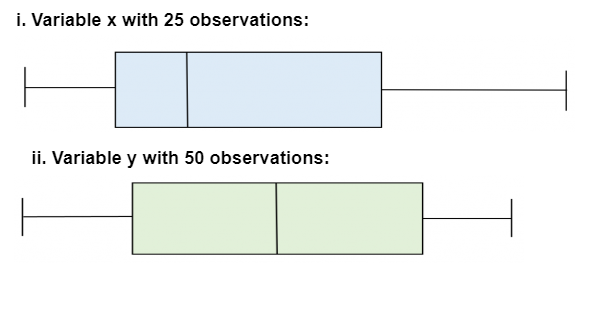

The distributions of two variables x and y are given below in the form of boxplots

In [308]:
# Distribution of variable x:

# We know that the line inside the boxplot represents the mean.
# As clearly visible from the boxplot for x, it’s mean is not at the centre. It is significantly towards the left.
# When plotted, it’s peak will also shift towards left as follows which means it does not follow normal distribution.
# This is known as being highly skewed distribution (We will study skewness in detail in a few classes).
# Therefore, neither of Z or T-test can be used for distribution x.

# Distribution of variable y:

# Here, the distribution of variable y is normal.
# Hence, we can use Z-test or T-test.

A pharmaceutical company is developing a new drug to decrease the blood pressure. In a clinical trial, they measured the blood pressure of 30 participants before administering the new drug.

After a month of treatment, they measured the blood pressure again for the same group. The company wants to determine if there is a significant decrease in blood pressure after using the new drug.

Which hypothesis test should the company use, and what are the characteristics of the test?

In [309]:
# In this scenario, the company is interested in assessing whether there is a significant decrease in blood pressure after using the new drug.

# Since the blood pressure is measured for the same participants before and after treatment, it involves paired observations. Therefore, a Paired T-test is suitable.

# Null and Alternative Hypotheses:

# Null hypothesis (H₀): There is no statistically significant difference in the average blood pressure before and after the new drug treatment.(µ_difference = 0),
# where µ_difference is the mean difference in blood pressure.

# Alternative hypothesis (H₁): There is a statistically significant decrease in the average blood pressure after the new drug treatment.(µ_difference < 0) assuming the drug aims to lower blood pressure.

# The test is one-tailed because the focus is in a particular direction of the distribution.

## **Chisquared Test**

A national survey was conducted to obtain information on the alcohol consumption patterns of U.S. adults by marital status.
A random sample of 1772 residents, aged 18 and older, yielded the data displayed in Table below:

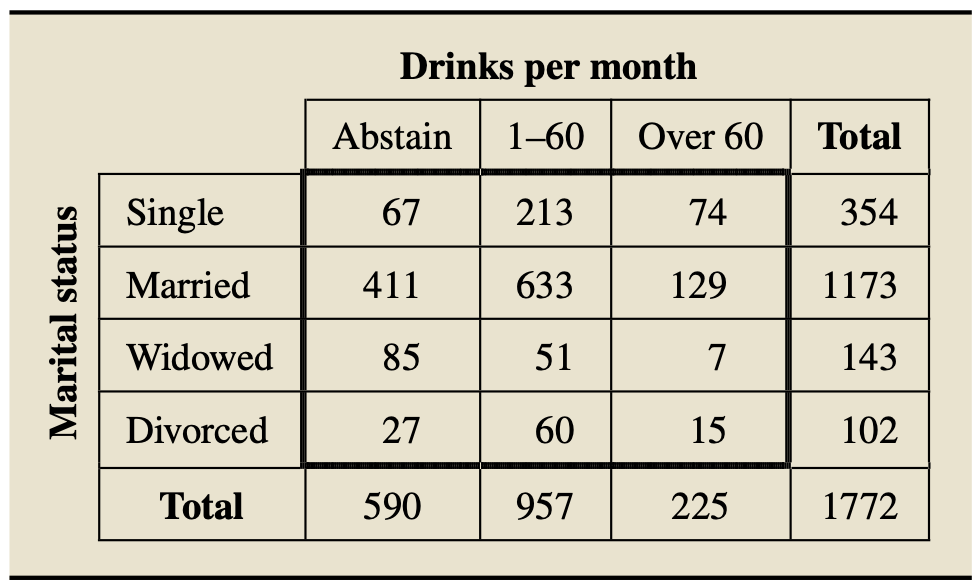

Test whether Marital status and alcohol consumption are associated with a 5% significance level.

In [310]:
# H0: Marital status and alcohol consumption are not associated.
# Ha: Marital status and alcohol consumption are associated.

observed = [[67,213,74], [411,633,129], [85,51,7], [27,60,15]]
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are not associated.")

Test statistic: 94.26880078578765
p-value: 3.925170647869838e-18
Reject H0 (Null Hypothesis),i.e. Marital status and alcohol consumption are associated.


A random sample of adults yielded the following data on age and Internet usage.

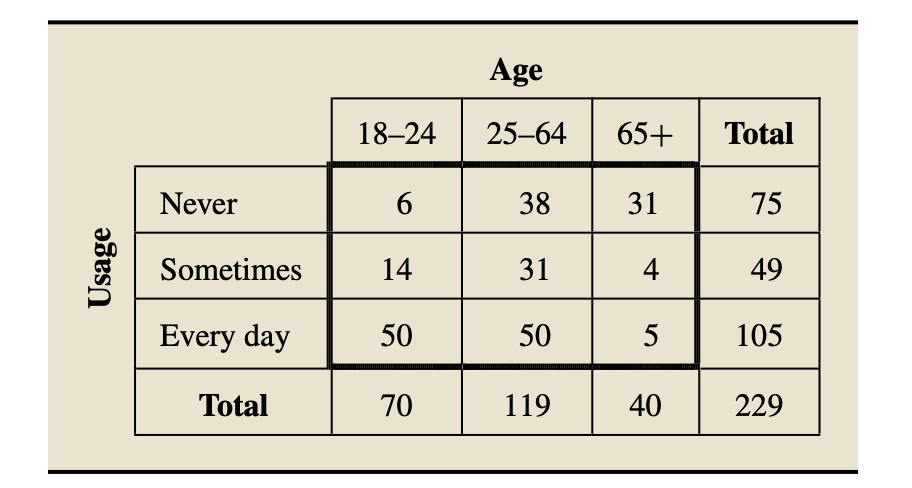

At 1% significance level, does the data provide sufficient evidence to conclude that an association exists between age and Internet usage?

In [311]:
# H0: Age and internet usage are not associated.
# Ha: Age and internet usage are associated.

observed = [[6,38,31], [14,31,4], [50,50,5]]
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Age and internet usagen are associated.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e.  Age and internet usage are not associated.")

Test statistic: 60.74604310295546
p-value: 2.0217185191724964e-12
Reject H0 (Null Hypothesis),i.e. Age and internet usagen are associated.


The U.S. Census Bureau compiles information on the money income of people by type of residence and publishes its finding in Current Population Reports.

Independent simple random samples of people consists of following types of residences

Inside Principal Cities (IPC),
Outside Principal Cities but within Metropolitan Areas (OPC), and
Outside Metropolitan Areas (OMA),
The Census gave the following data on income levels:

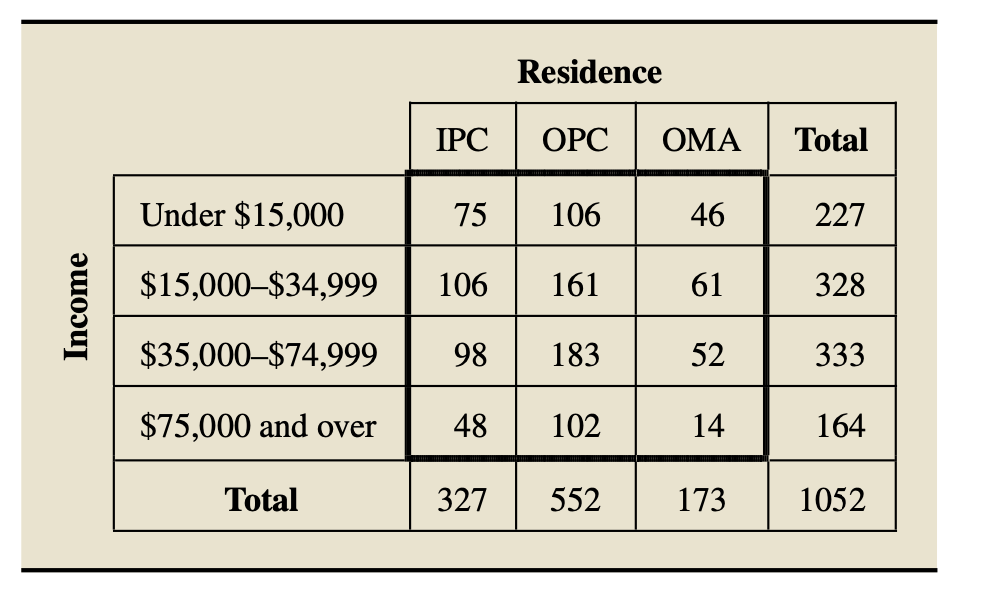

At the 5% significance level, can you conclude that the type of residence is related to income level?

In [312]:
# H0: Type of residence is not related to income level.
# Ha: Type of residence is related to income level.

observed = [[75,106,46], [106,161,61], [98,183,52],[48,102,14]]
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.05

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e.Type of residence is related to income level.")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e.  Type of residence is not related to income level.")

Test statistic: 15.727554171801787
p-value: 0.015293451318673136
Reject H0 (Null Hypothesis),i.e.Type of residence is related to income level.


According to a survey conducted on car owners, it was determined that
- 60% of owners have only one car
- 28% have two cars, and
- 12% have three or more cars.

Suppose Ram conducted his own survey within his residential society, and found that
- 73 owners have only one car,
- 38 owners have two cars, and
- 18 owners have three or more cars.

Determine whether Ram's survey supports the original one, with a significance level of 0.05.

In [313]:
observed = [73, 38, 18]

# Calculate the expected values based on the proportions from the original survey data
total_survey_size = sum(observed)
expected = [0.60 * total_survey_size, 0.28 * total_survey_size, 0.12 * total_survey_size]

alpha = 0.05

chi_stat, p_value = chisquare(observed, expected)

print("Chi-squared statistic:", chi_stat)
print("P-value:", p_value)

if p_value > alpha:
    print("Fail to reject the null hypothesis. Your survey supports the original one.")
else:
    print("Reject the null hypothesis. Your survey does not support the original one.")

Chi-squared statistic: 0.7582133628645247
P-value: 0.6844725882551137
Fail to reject the null hypothesis. Your survey supports the original one.


In [314]:
# Null Hypothesis (H0): The distribution of the number of cars owned by car owners in your survey is the same as the distribution in the original survey.
# Alternative Hypothesis (H1): The distribution of the number of cars owned by car owners in your survey is different from the distribution in the original survey.

# We can find out if our observations are consistent with the original survey using Chi-Square Goodness of Fit Test

# Original survey distribution
expected_distribution = np.array([0.60, 0.28, 0.12])

# Your survey results
observed_distribution = np.array([73, 38, 18])

# Calculate the expected counts based on your sample size
total_sample_size = observed_distribution.sum()
expected_counts = expected_distribution * total_sample_size

# Perform the Chi-Square Goodness of Fit test
chi_squared_stat, p_value = chisquare(f_obs=observed_distribution, f_exp=expected_counts)

# Define the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine significance
if p_value < alpha:
    print("Reject the null hypothesis. Your survey results are significantly different.")
else:
    print("Fail to reject the null hypothesis. Your survey results are consistent with the original survey.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. Your survey results are consistent with the original survey.
Chi-Square Statistic: 0.7582133628645247
P-value: 0.6844725882551137


A Mobile Retail store owner is interested in the distribution of popular smartphone brands among a group of 200 people.

They expect that 30% of people would prefer Brand A, 40% would prefer Brand B and 30% would prefer Brand C.

However, upon surveying the group, the results are as follows: 70 prefer Brand A, 80 prefer Brand B, and 50 prefer Brand C.

Conduct an appropriate test to see if the distribution of preferences matches the store owner's expectations at a 5% significance level.

In [315]:
# Null Hypothesis (H0): The distribution of smartphone brand preferences matches the expected distribution.
# Alternative Hypothesis (H1): The distribution of smartphone brand preferences does not match the expected distribution.

# In order to check whether the observed distribution matches the expectations, we can use Chi Squared Goodness of Fit test

observed_counts = np.array([70, 80, 50])
expected_counts = np.array([0.30 * 200, 0.40 * 200, 0.30 * 200])

chi_squared_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The distribution of smartphone brand preferences does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis. The distribution of smartphone brand preferences matches the expected distribution.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Fail to reject the null hypothesis. The distribution of smartphone brand preferences matches the expected distribution.
Chi-Square Statistic: 3.3333333333333335
P-value: 0.1888756028375618


In a social science survey, researchers investigate the relationship between two categorical variables.

Those variables, along with their categories are:

Variable A: PoliticalOpinions
- Strongly Agree,
- Agree,
- Disagree,
- Strongly Disagree

Variable B: DemographicInfo (Age Group)
- 18-25,
- 26-35,
- 36-50

The goal is to determine if there is a significant association between the opinions on the political issue and demographic characteristics, specifically age groups.
In this scenario, what is the degrees of freedom for the chi-square test of independence?

In [316]:
data = {'PoliticalOpinions' : ['Strongly Agree','Agree','Disagree','Strongly Disagree'],
        'DemographicInfo' : ['18-25','18-25', '26-35','36-50']}
df = pd.DataFrame(data)

In [317]:
pd.crosstab(columns=df['DemographicInfo'], index = df['PoliticalOpinions'])

DemographicInfo,18-25,26-35,36-50
PoliticalOpinions,,,
Agree,1,0,0
Disagree,0,1,0
Strongly Agree,1,0,0
Strongly Disagree,0,0,1


In [318]:
# For a chi-square test of independence, the degrees of freedom are calculated as

# df = (rows - 1) x (columns - 1)
# df = (3-1) * (4-1)
# df = 2 * 3
# df = 6

Suppose you are interested in the distribution of time spent on a website, by it's users.

You expect that:
- 20% of users spend less than 5 minutes,
- 50% spend between 5 and 10 minutes, and
- 30% spend more than 10 minutes.

After collecting data from 200 users, you find that
- 30 users spent less than 5 minutes,
- 85 users spent between 5 and 10 minutes, and
- 85 users spent more than 10 minutes.

Conduct an appropriate test to see if the distribution of browsing times matches your expectations at a 5% significance level.

In [319]:
# Null Hypothesis (H0): The distribution of browsing times matches the expected distribution.
# Alternative Hypothesis (H1): The distribution of browsing times does not match the expected distribution.

# In order to check whether the observed distribution matches the expectations, we can use Chi Squared Goodness of Fit test

observed_counts = np.array([30, 85, 85])
expected_counts = np.array([0.20 * 200, 0.50 * 200, 0.30 * 200])

chi_squared_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: The distribution of browsing times does not match expectations.")
else:
    print("Fail to reject the null hypothesis: The distribution of browsing times matches expectations.")

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

Reject the null hypothesis: The distribution of browsing times does not match expectations.
Chi-Square Statistic: 15.166666666666666
P-value: 0.0005088621855732918


Suppose you have a coin. You toss the coin 100 times and get 48 heads and 52 tails.

Perform a test to check whether the coin is fair or biased.

You want to determine if the coin is fair at a 5% significance level.

In [320]:
# Null Hypothesis (H0): The coin is fair (P(heads) = 0.5).
# Alternative Hypothesis (H1): The coin is not fair (P(heads) ≠ 0.5).

# Under the assumption of null hypothesis, we would expect to get 50 heads and 50 tails.

# We need to use the Chi Square Goodness of Fit Test to check if H0 is true.

observed_counts = np.array([48, 52])
expected_counts = np.array([50, 50])

chi_squared_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

alpha = 0.05

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. The coin is not fair.")
else:
    print("Fail to reject the null hypothesis. The coin is fair.")

Chi-Square Statistic: 0.16
P-value: 0.6891565167793516
Fail to reject the null hypothesis. The coin is fair.


Suppose you have data on 150 students' exam scores, and you want to test if the distribution of scores falls within predefined categories.

The expected distribution is

- 30% in the "Excellent" category,
- 40% in the "Good" category, and
- 30% in the "Average" category.

Upon observation, you notice that there are:
- 45 students fall into the "Excellent" category,
- 50 students into the "Good" category, and
- 55 students into the "Average" category.

Conduct an appropriate test to see if the distribution matches expectations at a 5% significance level,

In [321]:
# Null Hypothesis (H0): The distribution of exam scores matches the expected distribution.
# Alternative Hypothesis (H1): The distribution of exam scores does not match the expected distribution.

# In order to check whether the observed distribution matches the expectations, we can use Chi Squared Goodness of Fit test

observed_counts = np.array([45, 50, 55])
expected_counts = np.array([0.30 * 150, 0.40 * 150, 0.30 * 150])

chi_squared_stat, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"Chi-Square Statistic: {chi_squared_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The distribution of exam scores does not match the expected distribution.")
else:
    print("Fail to reject the null hypothesis. The distribution of exam scores matches the expected distribution.")

Chi-Square Statistic: 3.8888888888888893
P-value: 0.1430666827544082
Fail to reject the null hypothesis. The distribution of exam scores matches the expected distribution.


Preventable chronic diseases are increasing rapidly in Native American populations, particularly diabetes.

Below is a contingency table showing the cross-classification of educational attainment and diabetic state.

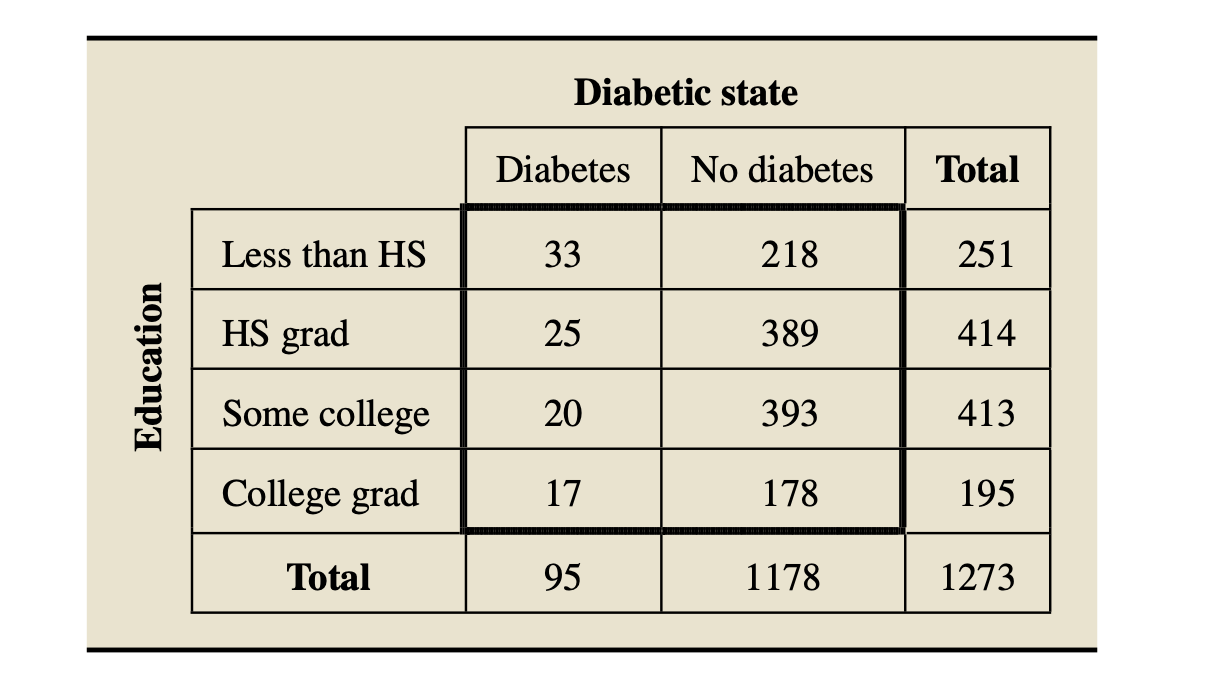

At 1% significance level, does the data provide sufficient evidence to conclude that an association exists between educational level and diabetic state for Native Americans?

In [322]:
# H0: educational level and diabetic state are not associated
# Ha: educational level and diabetic state are associated

observed = [[33, 218],[25, 389],[20, 393],[17, 178]]

test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are associated")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are not associated")

Test statistic: 17.51186847271713
p-value: 0.000554511571355531
Reject H0 (Null Hypothesis),i.e. educational level and diabetic state are associated


A Nationwide survey was conducted where an independent and random sample of adults residing in urban, suburban, and rural regions, were asked a question: "Do you support or oppose the motion of requiring a background check, for all gun buyers?"

The survey results are in the table below:
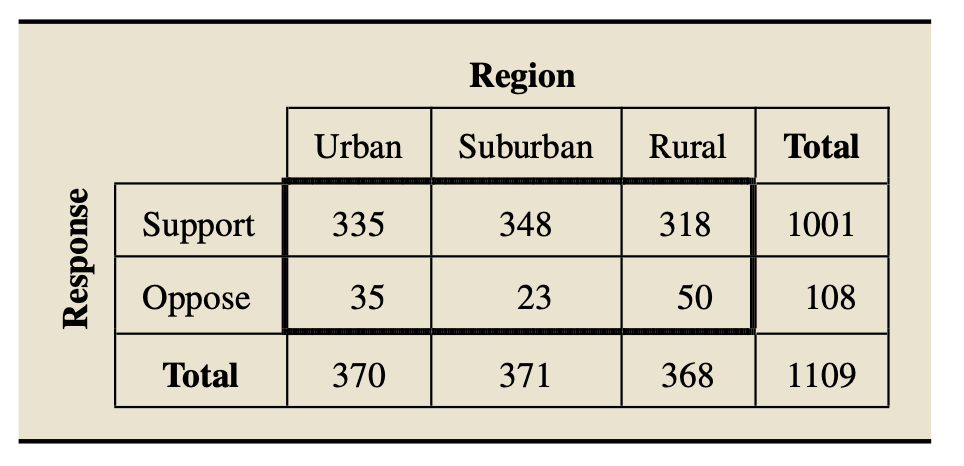

At 1% significance level, does the data provide sufficient evidence to conclude that there is an association between the region that an adult resides in, and the response received from them?

In [323]:
# H0: Response and regions are not associated
# Ha: Response and regions are associated

observed = [[335, 348, 318],[35, 23,50]]

test_statistic, p_value, dof, expected_values = chi2_contingency(observed)

print("Test statistic:", test_statistic)
print("p-value:", p_value)

alpha = 0.01

if(p_value < alpha):
  print("Reject H0 (Null Hypothesis),i.e. Response and regions are associated")
else:
  print("Fail to Reject H0 (Null Hypothesis),i.e. Response and regions are not associated")

Test statistic: 11.519544916042339
p-value: 0.003151828690194211
Reject H0 (Null Hypothesis),i.e. Response and regions are associated


## **ANOVA**

You are analyzing data on the number of defects in products produced by three different machines.

What statistical test would you use to determine if the variances in the number of defects are significantly different between the machines?

In [324]:
# Kruskal Wallis test is used to determine if there are any statistically significant differences between the medians of three or more independent (unrelated) groups.
# Shapiro Wilk test is used to check if a sample comes from a normally distributed population.
# ANOVA is used to determine if there are any statistically significant differences between the means of three or more independent (unrelated) groups.
# Levene’s Test assesses the homogeneity of variances for a set of independent samples. Commonly used before ANOVA to check the assumption of equal variances.

Assumptions of ANOVA

In [325]:
# Populations from which samples are drawn should be normal because ANOVA is a parametric test based on the assumption that the data follow the normal distribution.
# Hence it is necessary to test the normality. If the data does not follow the normal distribution, ANOVA cannot be applied.

# The value of 1 observation must not influence the value of other observations.
# All experimental units must be independent, and each experimental unit must contribute only 1 response value and the samples should be drawn randomly from the larger normal population.
# The samples should be drawn randomly and independently.

# The variability between the dependent variables within different groups is equal as a significantly different variance could overshadow
# the differences between means and lead to incorrect conclusions

If a QQ plot displays points deviating both above and below the reference line, what might you infer about the dataset?

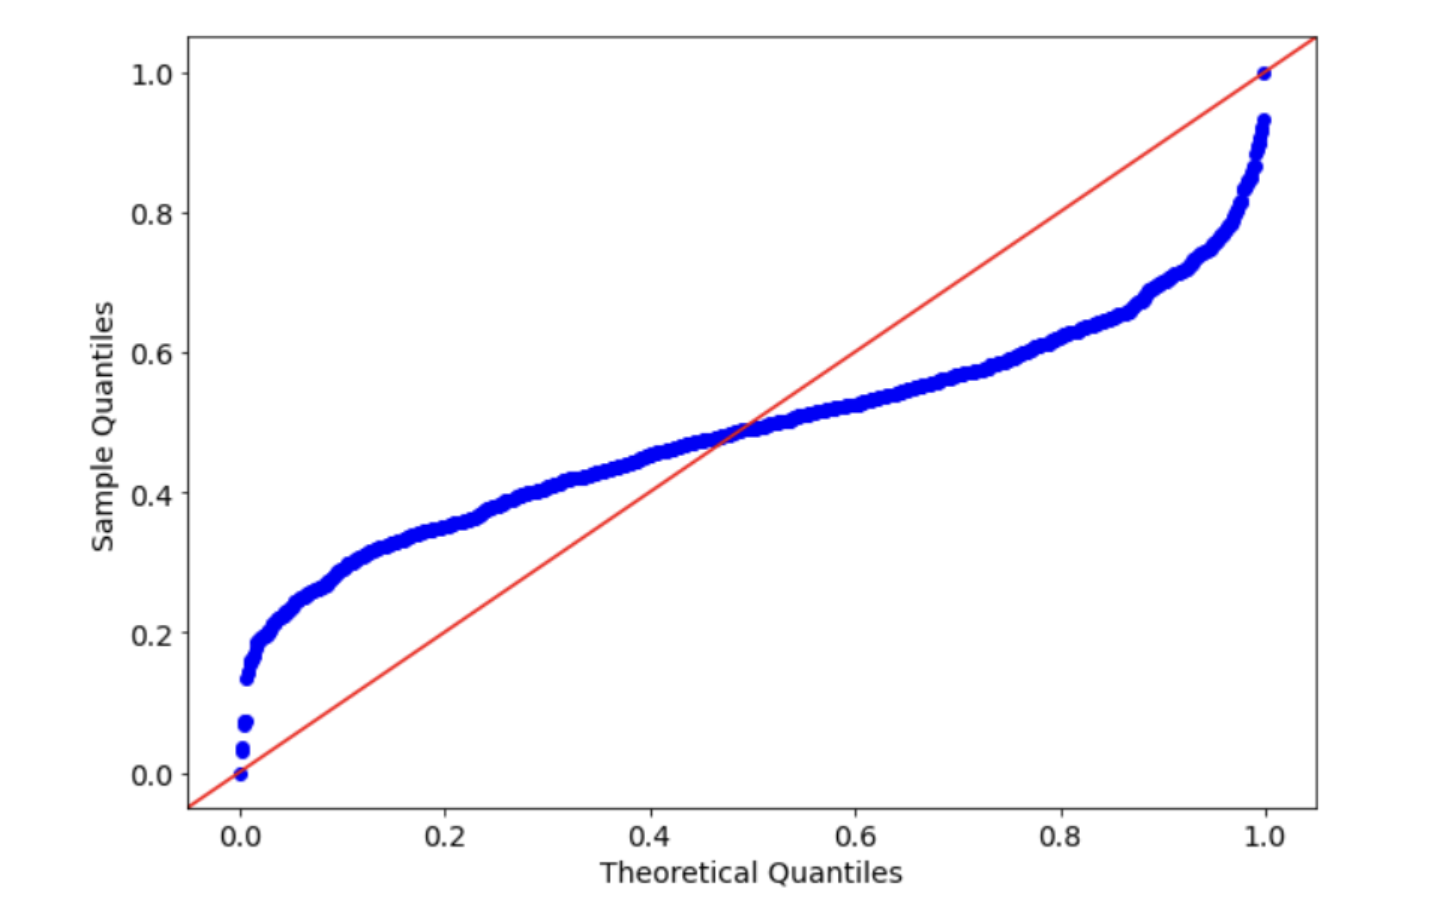

In [326]:
# If a QQ plot displays points deviating both above and below the line, it suggests that the dataset has outliers.
# Outliers are data points that significantly differ from the overall pattern of the dataset.
# In a QQ plot, these outliers manifest as points that deviate from the expected line, indicating a departure from the normal distribution.

The United States is divided into four regions: Northeast, Midwest, South and West regions.

Independent random samples of households in these regions yielded the data on last year’s energy consumptions.

a = [13, 8, 11, 12, 11]

b = [15, 10, 16, 11, 13, 10]

c = [5, 11, 9, 5]

d = [8, 10, 6, 5, 7]

At a 5% significance level, does the data provide sufficient evidence to conclude that there is a difference in last year’s mean energy consumption
by households among the four regions?

In [327]:
# H0 : Last year’s mean energy consumption is equal among households of the four regions
# Ha : Not all regions’ households had the same mean energy consumption in last year
# Since we are required to conduct an experiment between MULTIPLE groups at the same time, we will use ANOVA Test

a = [13, 8, 11, 12, 11]
b = [15, 10, 16, 11, 13, 10]
c = [5, 11, 9, 5]
d = [8, 10, 6, 5, 7]

test_statistic, p_value = f_oneway(a,b,c,d)

print(p_value)

if p_value < 0.05:
    print("Reject H0; Not all regions' households had the same mean energy consumption in last year")
else:
    print("Fail to reject H0; Last year's mean energy consumption is equal among households of the four regions")

0.0049302919205628576
Reject H0; Not all regions' households had the same mean energy consumption in last year


There is a website, "www.goodreads.com" where people can leave their reviews about a book and rate them on a scale of 1 to 5 stars.
The following table gives the number of pages of a random sample of books with different ratings, as listed on the site:

one_star = [382, 391, 335, 368, 400, 372]

two_star = [560, 343, 512, 329, 391, 367]

three_star = [384, 458, 409, 309, 374, 459]

four_star = [325, 390, 304, 240, 306, 169]

five_star = [360, 298, 272, 368, 320, 326]

At a 1% significance level, does the data provide sufficient evidence to conclude that there is a difference in the mean number of pages among books in these five rating groups?

In [328]:
# H0: Number of pages in the books belonging to different rating groups is same
# Ha: Number of pages in the books belonging to different rating groups is different
# Since we are required to conduct an experiment between MULTIPLE groups at the same time, we will use ANOVA Test

one_star = [382, 391, 335, 368, 400, 372]
two_star = [560, 343, 512, 329, 391, 367]
three_star = [384, 458, 409, 309, 374, 459]
four_star = [325, 390, 304, 240, 306, 169]
five_star = [360, 298, 272, 368, 320, 326]

test_statistic, p_value = f_oneway(one_star, two_star, three_star, four_star, five_star)

print(p_value)

alpha = 0.01
if  p_value < alpha:
    print("Reject H0, Number of pages in the books belonging to different rating groups is different")
else:
    print("Fail to reject H0; Number of pages in the books belonging to different rating groups is same")

0.009362001936328837
Reject H0, Number of pages in the books belonging to different rating groups is different


Consumer Reports publishes reviews and comparisons of products based on results from its laboratory.
Data from their website gave the following table for battery lives in hours, for samples of smartphones made by four different mobile companies.

Brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]

Brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]

Brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]

Brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

At a 2% significance level, does the data provide sufficient evidence to conclude that there is a significant difference in the mean battery life, among the four brands?

And, if significant, then perform pairwise T-tests to identify which pairs of smartphone brands offer a different mean battery life.

In [329]:
# Null Hypothesis (H0): There are no significant differences in the mean battery life of smartphones among these 4 brands
# Alternative Hypothesis (H1): There is at least one pair of smartphone brands that offer a significant difference in their mean battery
# We can use the following code for the same. The significance level is set at 0.02

# Sample data for battery life of different smartphone brands
brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(brand_A, brand_B, brand_C, brand_D)

# Print the results
print("One-Way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.02

# Interpret the results of one-way ANOVA
if p_value < alpha:
   print("Reject the null hypothesis")
   print("There is at least one pair of smartphone brands that offer a significantly different mean battery life.")
else:
   print("Fail to reject the null hypothesis")
   print("There are no significant differences in the mean battery life of smartphones among these 4 brands.")

One-Way ANOVA results:
F-statistic: 404.7865500650496
P-value: 2.392149441499325e-24
Reject the null hypothesis
There is at least one pair of smartphone brands that offer a significantly different mean battery life.


In [330]:
# Since there is a significant difference between at least one pair of smartphone brands, in order to find out which one,
# we need to Perform T-Test for each pair of different brands, and calculate the t-statistic and p-value for each pair.
# These pairs are:

# A vs. B,
# A vs. C,
# A vs. D,
# B vs. C,
# B vs. D,
# C vs. D.
# Therefore, we formulate our Hypotheses as:

# H0: There is no significant difference in the mean battery life between the two smartphone brands, i.e. they offer the same battery life.
# Ha: There is a significant difference in the mean battery life between the two smartphone brands.
# The significance level is set at 0.02

# Sample data for battery life of different brand smartphones
brand_A = [19.60, 18.82, 19.00, 18.45, 19.79, 19.03, 17.89, 19.42]
brand_B = [21.10, 20.00, 20.43, 19.67, 18.99, 19.98, 20.14, 19.78]
brand_C = [10.31, 10.02, 9.41, 9.89, 10.05, 10.52, 11.02, 10.42]
brand_D = [17.02, 16.71, 17.78, 18.65, 15.98, 17.63, 17.00, 16.78, 16.92, 17.14]

# Perform pairwise t-tests
result_ab = ttest_ind(brand_A, brand_B)
result_ac = ttest_ind(brand_A, brand_C)
result_ad = ttest_ind(brand_A, brand_D)
result_bc = ttest_ind(brand_B, brand_C)
result_bd = ttest_ind(brand_B, brand_D)
result_cd = ttest_ind(brand_C, brand_D)

# Significance level
alpha = 0.02

# Print results
print("Pairwise t-test results:")
print("A vs. B:", "Pvalue = ", result_ab.pvalue, " ; Significant difference in Mean Battery life" if result_ab.pvalue <= alpha else "No difference in mean Battery life")
print("A vs. C:", "Pvalue = ", result_ac.pvalue, " ; Significant difference in Mean Battery life" if result_ac.pvalue <= alpha else "No difference in mean Battery life")
print("A vs. D:", "Pvalue = ", result_ad.pvalue, " ; Significant difference in Mean Battery life" if result_ad.pvalue <= alpha else "No difference in mean Battery life")
print("B vs. C:", "Pvalue = ", result_bc.pvalue, " ; Significant difference in Mean Battery life" if result_bc.pvalue <= alpha else "No difference in mean Battery life")
print("B vs. D:", "Pvalue = ", result_bd.pvalue, " ; Significant difference in Mean Battery life" if result_bd.pvalue <= alpha else "No difference in mean Battery life")
print("C vs. D:", "Pvalue = ", result_cd.pvalue, " ; Significant difference in Mean Battery life" if result_cd.pvalue <= alpha else "No difference in mean Battery life")

Pairwise t-test results:
A vs. B: Pvalue =  0.005464761718691163  ; Significant difference in Mean Battery life
A vs. C: Pvalue =  2.0378129111849533e-14  ; Significant difference in Mean Battery life
A vs. D: Pvalue =  3.271164766368406e-05  ; Significant difference in Mean Battery life
B vs. C: Pvalue =  3.618464053986992e-15  ; Significant difference in Mean Battery life
B vs. D: Pvalue =  1.3124601764847073e-07  ; Significant difference in Mean Battery life
C vs. D: Pvalue =  8.33672049161488e-14  ; Significant difference in Mean Battery life


In [331]:
# Hence, we conclude that all four smartphone brands offer a significantly different mean battery life.

A software development team is comparing the performance of three different algorithms for sorting large datasets.

The team collects the execution time (in milliseconds) for each algorithm on 20 different datasets:

algorithm_A = np.array([23, 25, 22, 27, 28, 24, 26, 29, 21, 30, 25, 43, 26, 28, 24, 22, 27, 46, 25, 29])

algorithm_B = np.array([31, 28, 29, 32, 30, 33, 27, 28, 32, 30, 31, 29, 30, 48, 33, 31, 29, 30, 32, 31])

algorithm_C = np.array([45, 43, 23, 49, 49, 8, 21, 20, 42, 40, 28, 46, 44, 37, 44, 38, 42, 34, 42, 40])

Check for the assumptions of One-way ANOVA & decide the appropriate test to determine if there is a statistically significant difference in the execution times of the three algorithms at a 95% confidence level.

In [332]:
# Normality Check: We will perform a Shapiro-Wilk test to test if data follows normal distribution.
# Equal Variance Check: We will perform Levene test to test for equal variances across groups.

algorithm_A = np.array([23, 25, 22, 27, 28, 24, 26, 29, 21, 30, 25, 43, 26, 28, 24, 22, 27, 46, 25, 29])
algorithm_B = np.array([31, 28, 29, 32, 30, 33, 27, 28, 32, 30, 31, 29, 30, 48, 33, 31, 29, 30, 32, 31])
algorithm_C = np.array([45, 43, 23, 49, 49, 8, 21, 20, 42, 40, 28, 46, 44, 37, 44, 38, 42, 34, 42, 40])

# H0: Data is Gaussian
# Ha: Data is not Gaussian

# Shapiro-Wilk test

stat, pvalue_a = shapiro(algorithm_A)
stat, pvalue_b = shapiro(algorithm_B)
stat, pvalue_c = shapiro(algorithm_C)

alpha = 0.05

print("Shaprio results:")
print("algorithm_A:", pvalue_a,"; Not normally distributed" if pvalue_a <= alpha else " ; Normally distributed")
print("algorithm_B:", pvalue_b,"; Not Normally distributed" if pvalue_b <= alpha else " ; Normally distributed")
print("algorithm_C:", pvalue_c,"; Not Normally distributed" if pvalue_c <= alpha else " ; Normally distributed")
print()

Shaprio results:
algorithm_A: 0.00012557873560581356 ; Not normally distributed
algorithm_B: 3.6959927456337027e-06 ; Not Normally distributed
algorithm_C: 0.007560277823358774 ; Not Normally distributed



In [333]:
# H0: Variances are equal
# Ha: Variances are not equal

# Levene test
statistic, pvalue_levene = levene(algorithm_A, algorithm_B, algorithm_C)
print('Levene test p-value:',pvalue_levene)

if p_value < 0.05:
 print("Variances are not equal")
else:
 print("Variances are equal")

Levene test p-value: 0.018090536773928783
Variances are not equal


In [334]:
# Since we can see that data does not follow assumptions of One Way ANOVA, we will need to perform Kruskal-Wallis test in order to make conclusions.

# Null Hypothesis (H0): The medians of the execution times are the same for all three algorithms.
# Alternative Hypothesis (H1): At least one of the medians of the execution times is different among the three algorithms.

stat, p_value = kruskal(algorithm_A, algorithm_B, algorithm_C)

print("test statistic:",stat)
print("p_value:",p_value)

if p_value < 0.05:
   print("Reject H0")
   print("At least one of the medians of the execution times is different among the three algorithms")
else:
   print("Fail to reject H0")
   print("The medians of the execution times are the same for all three algorithms.")


test statistic: 15.347265483520486
p_value: 0.00046492579685792804
Reject H0
At least one of the medians of the execution times is different among the three algorithms


The pharmaceutical company collected data on the treatment effects (values in corresponding units) of two drug formulations (Group A and Group B) in a study

group_a_effects = [1.5, 1.8, 1.2, 1.6, 1.7]

group_b_effects = [1.4, 1.9, 1.3, 1.5, 1.8]

The researchers want to assess whether the variances of the treatment effects are significantly different among the two groups.

Perform the appropriate test with a 90% confidence level, calculate the p-value and interpret the conclusions.

In [335]:
# H0: The variances between the groups are equal
# Ha: The variances between the groups are different

# Further it is mentioned that alpha = 0.1 (90% confidence level)
# So we need to compute the pvalue of Levene’s test, and compare it to alpha

# Treatment effects for Group A and Group B
group_a_effects = [1.5, 1.8, 1.2, 1.6, 1.7]
group_b_effects = [1.4, 1.9, 1.3, 1.5, 1.8]

# Perform Levene's test
statistic, p_value = levene(group_a_effects, group_b_effects)

print("Levene's Test Statistic:", statistic)
print("P-value:", p_value)

# 90% Confidence level
alpha = 0.1

if p_value < alpha:
 print('Reject H0; The variances between the groups are different')
else:
 print('Fail to reject H0; The variances between the groups are same')

Levene's Test Statistic: 0.1666666666666667
P-value: 0.693799838016959
Fail to reject H0; The variances between the groups are same


A pharmaceutical company conducted a clinical trial to test the effectiveness of three different drug treatments (Drug A, Drug B, and Drug C) on patients with a specific medical condition.

The trial measured the reduction in symptoms for each patient after treatment. The dataset consists of three groups, each representing one drug treatment, where each value represents the unit difference before and after taking the drugs.

drug_a = [8, 17, 16, 25, 17]

drug_b = [9, 8, 16, 7, 8]

drug_c = [7, 6, 5, 4, 6]

Conduct an appropriate test to assess overall differences with a 99% confidence level and, if significant, perform pairwise t-tests to identify which pairs of drug treatments exhibit significant differences in the reduction of symptoms.

In [336]:
# Null Hypothesis (H0): There are no significant differences in symptom reduction caused by the three drug treatments
# Alternative Hypothesis (H1): There is at least one pair of drug treatment that results in significant different symptom reduction.
# Further, we need to be 99% confident in our conclusions.

# Sample data for each drug treatment (reduction in symptoms)
drug_a = [8, 17, 16, 25, 17]
drug_b = [9, 8, 16, 7, 8]
drug_c = [7, 6, 5, 4, 6]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(drug_a, drug_b, drug_c)

# Print the results
print("One-Way ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.01

# Interpret the results of one-way ANOVA
if p_value < alpha:
   print("Reject the null hypothesis")
   print("There is at least one significant difference in symptom reduction among the three drug treatments.")
else:
   print("Fail to reject the null hypothesis")
   print("There are no significant differences in symptom reduction caused by the three drug treatments.")

One-Way ANOVA results:
F-statistic: 9.135559921414536
P-value: 0.003880757912319522
Reject the null hypothesis
There is at least one significant difference in symptom reduction among the three drug treatments.


In [337]:
# Now that we know there is a significant difference among the drug treatments, we need to Perform Pairwise T-Test for each pair of drug treatments
# (A vs. B, B vs. C, A vs. C), and calculate the t-statistic and p-value for each pair.

# Therefore, we formulate our Hypotheses as:

# H0: There is no significant difference in the mean reduction in symptoms between the two drug treatments.
# Ha: There is a significant difference in the mean reduction in symptoms between the two drug treatments.
# The significance level is set at 0.01

# Sample data for each drug treatment (reduction in symptoms)
drug_a = [8, 17, 16, 25, 17]
drug_b = [9, 8, 16, 7, 8]
drug_c = [7, 6, 5, 4, 6]

# Perform pairwise t-tests
result_ab = ttest_ind(drug_a, drug_b)
result_bc = ttest_ind(drug_b, drug_c)
result_ac = ttest_ind(drug_a, drug_c)

# Significance level
alpha = 0.01

# Print results
print("Pairwise t-test results:")
print("A vs. B:", result_ab.pvalue," ; Significant" if result_ab.pvalue <= alpha else " ; No Significant")
print("B vs. C:", result_bc.pvalue," ; Significant" if result_bc.pvalue <= alpha else " ; No Significant")
print("A vs. C:", result_ac.pvalue," ; Significant" if result_ac.pvalue <= alpha else " ; No Significant")

Pairwise t-test results:
A vs. B: 0.05695934338403185  ; No Significant
B vs. C: 0.04735481485792407  ; No Significant
A vs. C: 0.003888074101483069  ; Significant


A Company wishes to test whether three sales persons Saurav, Naveen, and Radha make the same sales or they differ in their selling ability by comparing the average number of sales made by them last week.

Out of 14 sales 'Saurav' made 5, 'Naveen' made 4 and 'Radha' made 5. The following arrays describes the records of the sales persons in rupees.

Saurav = [300, 400, 300, 500, 50]

Naveen = [600, 300, 300, 400]

Radha = [700, 300, 400, 600, 500]

Test whether the average sales of the Saurav, Naveen, and Radha differ in size at a 95% confidence level

In [338]:
Saurav = [300, 400, 300, 500, 50]
Naveen = [600, 300, 300, 400]
Radha = [700, 300, 400, 600, 500]

# Shapiro-Wilk test

stat, pvalue_a = shapiro(Saurav)
stat, pvalue_b = shapiro(Naveen)
stat, pvalue_c = shapiro(Radha)

alpha = 1 - 0.95

print("Shaprio results:")
print("Saurav:", pvalue_a,"; Not normally distributed / Significant" if pvalue_a <= alpha else " ; Normally distributed /  No Significant")
print("Naveen:", pvalue_b,"; Not Normally distributed / Significant" if pvalue_b <= alpha else " ; Normally distributed /  No Significant")
print("Radha:", pvalue_c,"; Not Normally distributed / Significant" if pvalue_c <= alpha else " ; Normally distributed /  No Significant")
print()

Shaprio results:
Saurav: 0.6155813932418823  ; Normally distributed /  No Significant
Naveen: 0.1611907184123993  ; Normally distributed /  No Significant
Radha: 0.9671739339828491  ; Normally distributed /  No Significant



In [339]:
# Null Hypothesis (H0): The average sales of Saurav, Naveen, and Radha are equal.
# Alternative Hypothesis (Ha): At least one of the salesperson's average sales is different from the others.

saurav = np.array([300, 400, 300, 500, 50])
naveen = np.array([600, 300, 300, 400])
radha = np.array([700, 300, 400, 600, 500])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(saurav, naveen, radha)

# Significance level (alpha)
alpha = 0.05

print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Compare p-value with significance level
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in average sales.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in average sales.")

F-statistic: 1.8263524159663869
p-value: 0.20659122081429684
Fail to reject null hypothesis: There is no significant difference in average sales.


The Highway Administration conducts an annual survey on motor vehicles travelling on the highway. They publish their findings in Highway Statistics, based on different types of vehicles.
Independent simple random samples of cars, buses, and trucks yielded the data on a number of thousand miles driven last year.

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]

buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]

trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

We want to decide if there is a difference in last year’s mean number of miles driven among cars, buses, and trucks.

At a 93% confidence level, does the data provide sufficient evidence to conclude that there is a difference in last year’s mean number of miles driven by cars, buses, and trucks?

In [340]:
# H0 : Mean no. of miles driven on the highway, by the different vehicle types was same in the last year
# Ha : Mean no. of miles driven on the highway, by the different vehicle types was different in the last year
# Since we are required to conduct an experiment between MULTIPLE groups at the same time, we will use ANOVA Test

cars = [19.9, 15.3, 2.2, 6.8, 34.2, 8.3, 12.0, 7.0, 9.5, 1.1]
buses = [1.8, 24.6, 7.2, 37.0, 7.2, 21.2, 6.5, 23.6]
trucks = [13.3, 23.0, 25.4, 15.3, 57.1, 14.5, 26.0]

test_statistic, p_value = f_oneway(cars, buses, trucks)
print("p_value:",p_value)

alpha = 0.07
if  p_value < alpha:
    print("Reject H0; Mean no. of miles driven on the highway, by the different vehicle types was different in the last year")
else:
    print("Fail to reject H0; Mean no. of miles driven on the highway, by the different vehicle types was same in the last year")

p_value: 0.10782985675757563
Fail to reject H0; Mean no. of miles driven on the highway, by the different vehicle types was same in the last year


A researcher is interested in determining the effects of different dosages of a dietary supplement on the performance of both males and females on a physical endurance test.

The three different dosages of the medicine are low, medium, and high, and the genders are male and female.

Conduct an appropriate hypothesis test to determine the interaction effects of the test at a 1% significance level.

In [341]:
from io import StringIO

# Given data in a string format
data_str = """Dietary,Supplement_Dosage,Test_values
Female,Low,35.6
Female,Medium,49.4
Female,High,55.2
Male,Low,92.2
Male,Medium,45.4
Male,High,70.8
Female,Low,56.9
Female,Medium,87.0
Female,High,23.4
Male,Low,45.9
Male,Medium,34.2
Male,High,98.9"""

df = pd.read_csv(StringIO(data_str))
df.head()

,Dietary,Supplement_Dosage,Test_values
0,Female,Low,35.6
1,Female,Medium,49.4
2,Female,High,55.2
3,Male,Low,92.2
4,Male,Medium,45.4


**Main Effect**
- Gender
  - H0: The test values acorss various gender is the same.
  - H1: The test values acorss various gender are different.

- Supplement_Dosage
  - H0: The test values acorss various supplement dosage is the same.
  - H1: The test values acorss various supplement dosage are different.

**Interaction Effect**
- H0: The avg sales acorss various gender and supplement dosage are the same.
- H1: The avg sales acorss various gender and supplement dosage are different.

Based on the given problem,

we need to analyzes the independent effects of two categorical variables (dosage & gender) on a continuous variable (performance test values) while considering their potential interaction. Hence, we perform Two-way ANOVA to test the effects of the test.

We define our hypothesis as:

Null Hypothesis (H0):

There is no significant difference in average performance scores among different dietary supplement dosages.

There is no significant difference in average performance scores between male and female participants.

There is no significant interaction effect between dietary supplement dosage and gender on average performance scores.

Alternative Hypothesis (H1):

There is a significant difference in average performance scores among different dietary supplement dosages.

There is a significant difference in average performance scores between male and female participants.

There is a significant interaction effect between dietary supplement dosage and gender on average performance scores.

In [342]:
# fit an ols model on the data frame
# use 'fit()' to fit the linear model
# ols('dependent variable ~ C(independent variable1) * C(independent variable2)', data=df).fit()
test = ols('Test_values ~ C(Dietary) * C(Supplement_Dosage)', data=df).fit()

# create a table for a 2-way ANOVA test
# Pass the linear model 'test'
# 'typ = 2' performs two-way ANOVA
anova_table = sm.stats.anova_lm(test, typ = 2)

# Display the results
print(anova_table)

                                      sum_sq   df         F    PR(>F)
C(Dietary)                        532.000833  1.0  1.075214  0.339742
C(Supplement_Dosage)              130.811667  2.0  0.132190  0.878657
C(Dietary):C(Supplement_Dosage)  2869.201667  2.0  2.899438  0.131502
Residual                         2968.715000  6.0       NaN       NaN


The results of the Two-way ANOVA test indicate the following:

Dietary (Gender):
- The p-value is 0.339742, which is greater than the significance level of 0.01.
- Therefore, we fail to reject the null hypothesis for the effect of gender on average performance, suggesting that there is no significant difference in average performance between males and females.

Supplement Dosage:
- The p-value is 0.878657, exceeding the significance level.
- Thus, we fail to reject the null hypothesis related to the effect of supplement dosage on average performance.
- This implies that there is no significant difference in average performance among different dosages of the dietary supplement.

Interaction between Dietary and Supplement Dosage:
- The p-value is 0.131502, which is greater than 0.01.
- Consequently, we fail to reject the null hypothesis for the interaction effect between gender and supplement dosage.
- This suggests that the combined effect of gender and supplement dosage does not significantly impact average performance.

A researcher wants to investigate the effects of two different fertilizers (‘A’ & ‘B’) and three watering frequencies (‘Low’, ‘Medium’, ‘High’) on the growth of tomato plants.

Is there a significant interaction between the fertilizer type and watering frequency on plant growth?

Conduct an appropriate hypothesis test to determine only the interaction effects of this research at a 5% significance level.

In [343]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/059/216/original/Fertilizer.csv?1702370971')
df.head()

,Fertilizer,Watering_Frequency,Plant_Height
0,A,Low,15.2
1,A,Medium,20.7
2,A,High,24.3
3,B,Low,18.4
4,B,Medium,23.1


Based on the given problem,
we need to analyse the independent effects of two categorical variables (fertilizer types & watering frequencies) on a continuous variable (plant height) while considering their potential interaction. Hence, we perform Two-way ANOVA to test the effects of the test.

We define our hypothesis as:

Null Hypothesis (H0):
- There is no significant difference in average plant height among different fertilizer types.
- There is no significant difference in average plant height across different watering frequencies.
- There is no significant interaction effect between fertilizer type and watering frequency on average plant height.

Alternative Hypothesis (H1):
- There is a significant difference in average plant height among different fertilizer types.
- There is a significant difference in average plant height across different watering frequencies.
- There is a significant interaction effect between fertilizer type and watering frequency on average plant height.


In [344]:
# Fit the linear model
model = ols('Plant_Height ~ C(Fertilizer) * C(Watering_Frequency)', data=df).fit()
# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
# Print the ANOVA table
print(anova_table)

                                         sum_sq    df         F    PR(>F)
C(Fertilizer)                         84.067222   1.0  1.509060  0.242831
C(Watering_Frequency)                100.634444   2.0  0.903226  0.431117
C(Fertilizer):C(Watering_Frequency)   50.034444   2.0  0.449075  0.648519
Residual                             668.500000  12.0       NaN       NaN


Fertilizer Type (H0 vs. H1):
- F-statistic = 1.509060
- p-value = 0.242831
- Since the p-value is greater than 0.05 (significance level), we fail to reject the null hypothesis (H0).
- Therefore, there is no statistically significant difference in average plant height among different fertilizer types.

Watering Frequency (H0 vs. H1):
- F-statistic = 0.903226
- p-value = 0.431117
- Similar to the fertilizer type analysis, the p-value is greater than 0.05, leading us to fail to reject the null hypothesis (H0).
- This means there is no statistically significant difference in average plant height across different watering frequencies.

Interaction (H0 vs. H1):
- F-statistic = 0.449075
- p-value = 0.648519
- Again, the p-value exceeding 0.05 allows us to fail to reject the null hypothesis (H0).
- This implies that the effect of fertilizer type on plant growth does not differ significantly across different watering frequencies.

Conclusion:

There is no statistically significant evidence to suggest that fertilizer type, watering frequency, or their interaction have a significant impact on plant growth.

The Committee head of a national entrance exam wants to analyze if there are any differences in learning outcomes between students with different educational backgrounds (high school or college) and teaching methods (traditional or interactive) on test scores.

Conduct an appropriate hypothesis test to determine the main effects & interaction effects of the test at a 5% significance level.

In [345]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/059/218/original/Teaching_Method.csv?1702373208')
df.head()

,Education,Teaching_Method,Test_Score
0,High School,Traditional,72
1,High School,Interactive,85
2,College,Traditional,70
3,College,Interactive,92
4,High School,Traditional,74


Based on the given problem,
we need to analyse the independent effects of two categorical variables (educational backgrounds & teaching methods) on a continuous variable (test scores) while considering their potential interaction. Hence, we perform Two-way ANOVA to test the effects of the test.

Based on the setup, we can define our hypotheses as:

Null Hypothesis (H0):
- There is no significant difference in average test scores between students from different educational backgrounds.
- There is no significant difference in average test scores across teaching methods.
- There is no significant interaction effect between educational background and teaching method on average test scores.

Alternative Hypothesis (H1):
- There is a significant difference in average test scores between students from different educational backgrounds.
- There is a significant difference in average test scores across different teaching methods.
- There is a significant interaction effect between educational background and teaching method on average test scores.

In [346]:
model = ols('Test_Score ~ C(Education) * C(Teaching_Method)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq    df         F    PR(>F)
C(Education)                       6.25   1.0  0.081477  0.780172
C(Teaching_Method)               552.25   1.0  7.199348  0.019920
C(Education):C(Teaching_Method)    4.00   1.0  0.052146  0.823216
Residual                         920.50  12.0       NaN       NaN


Based on the ANOVA table, we can analyze the effects of educational background, teaching method, and their interaction on student test scores:

Educational Background (H0 vs. H1):
- F-statistic = 0.081477
- p-value = 0.780172
- Since the p-value is greater than 0.05 (significance level), we fail to reject the null hypothesis (H0).
- Therefore, there is no statistically significant difference in average test scores between students with different educational backgrounds.

Teaching Method (H0 vs. H1):
- F-statistic = 7.199348
- p-value = 0.019920
- The p-value is less than 0.05, leading us to reject the null hypothesis (H0).
- This suggests a statistically significant difference in average test scores across teaching methods.

Interaction (H0 vs. H1):
- F-statistic = 0.052146
- p-value = 0.823216
- With a p-value above 0.05, we fail to reject the null hypothesis (H0).
- This means the effect of educational background on test scores does not significantly differ across different teaching methods.

Conclusion:
The analysis indicates that the teaching method significantly impacts student test scores, while educational background does not significantly influence them.
However, no significant interaction exists between educational background and teaching method on student performance.

A coffee shop wants to understand the relationship between the age group ('20-30','31-40', '41-50') and their preferred coffee type (Light Roast, Medium Roast, Dark Roast) based on data collected from a local Coffee Barista.

Do age groups and coffee types interact to influence the number of orders?

Conduct an appropriate hypothesis test to determine the interaction effects of the relationship at a 5% significance level.

In [347]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/059/220/original/coffee.csv?1702374099')
df.head()

,Age_Group,Coffee_Type,Number_of_Orders
0,20-30,Light Roast,45
1,20-30,Medium Roast,60
2,20-30,Dark Roast,30
3,31-40,Light Roast,35
4,31-40,Medium Roast,40


Based on the given problem,
we need to analyse the independent effects of two categorical variables (coffee types & age groups) on a continuous variable (number of orders) while considering their potential interaction. Hence, we perform Two-way ANOVA to test the effects of the test.

Based on the given problem, we define our hypotheses as:
N
ull Hypothesis (H0):
- There is no significant difference in the number of orders across different coffee types.
- There is no significant difference in the number of orders across different age groups.
- There is no significant interaction effect between age group and coffee type on the number of orders.

Alternative Hypothesis (H1):
- There is a significant difference in the number of orders across different coffee types.
- There is a significant difference in the number of orders across different age groups.
- There is a significant interaction effect between age group and coffee type on the number of orders.

In [348]:
model = ols('Number_of_Orders ~ C(Age_Group) * C(Coffee_Type)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                 sum_sq   df         F    PR(>F)
C(Age_Group)                 686.777778  2.0  5.104046  0.032992
C(Coffee_Type)               143.444444  2.0  1.066061  0.384141
C(Age_Group):C(Coffee_Type)  493.888889  4.0  1.835260  0.206332
Residual                     605.500000  9.0       NaN       NaN


Based on the ANOVA table, we can analyze the effects of age group, coffee type, and their interaction on the number of orders placed at the coffee shop:

Age Group (H0 vs. H1):
- F-statistic = 5.104046
- p-value = 0.032992
- Since the p-value is less than 0.05 (significance level), we reject the null hypothesis (H0).
- This indicates a statistically significant difference in the number of orders across different age groups.

Coffee Type (H0 vs. H1):
- F-statistic = 1.066061
- p-value = 0.384141
- As the p-value is greater than 0.05, we fail to reject the null hypothesis (H0).
- This suggests no statistically significant difference in the number of orders across different coffee types.

Interaction (H0 vs. H1):
- F-statistic = 1.835260
- p-value = 0.206332
- With a p-value exceeding 0.05, we fail to reject the null hypothesis (H0).
- This implies that the effect of age group on the number of orders does not significantly differ across different coffee types.

Conclusion:

The analysis reveals a statistically significant difference in the number of orders across different age groups.
This indicates that age plays a role in coffee preferences and ordering behavior.
However, the coffee type does not exhibit a significant difference in the number of orders, suggesting that overall preferences might not be heavily influenced by coffee type alone.

There is no significant interaction effect exists between age group and coffee type, meaning that the effect of age on order numbers does not vary significantly across different coffee types.

## **KS Test**

A data analyst is comparing the sales amounts (in dollars) for two different marketing strategies (A and B). The sales data for 20 days under each strategy is collected.


sales_strategy_A = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]

sales_strategy_B = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]

Perform an appropriate test to assess if there is a significant difference in the sales distributions between Strategy A and Strategy B. Use a significance level of 0.05.

In [349]:
sales_strategy_A = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]
sales_strategy_B = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]

In [350]:
# Null Hypothesis (H0): The distributions of sales amounts for Strategy A and Strategy B are identical.
# Alternative Hypothesis (H1): The distributions of sales amounts for Strategy A and Strategy B are not identical.

statistic, p_value = kstest(sales_strategy_A, sales_strategy_B)
alpha = 0.05
print("KS Statistic:", statistic)
print("P-value:", p_value)

# Check if the p-value is less than alpha
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in the sales distributions between Strategy A and Strategy B.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in the sales distributions between Strategy A and Strategy B.")

KS Statistic: 0.65
P-value: 0.0002704973445409677
Reject the null hypothesis. There is a significant difference in the sales distributions between Strategy A and Strategy B.


An online shopping platform is testing two different delivery methods to improve the delivery times for their customers.

The data below represents the delivery times (in hours) for a sample of orders using Method A and Method B.

delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]

delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]

Using an appropriate test, determine if there is a significant difference in the delivery time distributions between Method A and Method B. Use a significance level of 0.05.

In [351]:
# H0: The delivery time distributions for Method A and Method B are the same.
# H1: The delivery time distributions for Method A and Method B are different.

delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]
delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]

ks_statistic, p_value = kstest(delivery_method_A, delivery_method_B)
alpha = 0.05

print("KS Statistic:", ks_statistic)
print("P-value:", p_value)

# Check if the p-value is less than alpha
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in the delivery time distributions between Method A and Method B.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in the delivery time distributions between Method A and Method B.")

KS Statistic: 0.5
P-value: 0.16782134274394334
Fail to reject the null hypothesis. There is no significant difference in the delivery time distributions between Method A and Method B.


## **A/B Test**

A bank is launching two different approaches (A and B) to encourage customers to adopt its new mobile banking app. The bank randomly assigns a group of customers to each approach and monitors their adoption rates over a month.

Data:

Group A (Approach A): [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]  
Group B (Approach B): [48, 45, 46, 43, 50, 44, 49, 47, 42, 46]

Objective:

Assess whether the new incentive program in Approach B leads to a statistically significant improvement in the adoption rates compared to Approach A.

Choose the suitable statistical test.

In [352]:
# The bank is conducting A/B testing to evaluate two different approaches (A and B) aimed at encouraging customers to adopt its new mobile banking app.
# A/B Testing Process:

# The bank collects adoption rate data from a random group of customers for both Approach A and Approach B.
# A two-sample t-test is performed to compare the means of the adoption rates between the two groups.
# The t-statistic and p-value are calculated.


# Null Hypothesis (H0): μA ≥ μB (There is no significant improvement in the adoption rates for Approach B compared to Approach A).
# Alternative Hypothesis (H1): μA < μB (There is a significant improvement in the adoption rates for Approach B compared to Approach A).

# Data
group_A = [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]
group_B = [48, 45, 46, 43, 50, 44, 49, 47, 42, 46]

# Two-sample t-test
t_statistic, p_value = stats.ttest_ind(group_A, group_B, alternative = 'less')

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05

if p_value < alpha:
   print("Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A")
else:
   print("Fail to reject the null hypothesis. There is no significant improvement in the adoption rates for Approach B compared to Approach A")

T-statistic: -6.125851335983492
P-value: 4.359142475666563e-06
Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A


Suppose you conducted an experiment to investigate the impact of two different advertising strategies (A and B) on the click-through rates of a website.

After running the experiment, you found that the click-through count for Strategy A was 150, and for Strategy B, it was 200.

Perform a hypothesis test to determine if the difference in click-through rates between Strategy A and Strategy B is statistically significant. Use a significance level of 0.05. Assume 1000 users were exposed to each strategy.

In [353]:
# You need to conduct an A/B test to evaluate two different advertising approaches (A and B) aimed at increasing click through rates for a website.
# A/B Testing Process:

# You have collected data about the click through rates, from a random group of customers for both Approach A and Approach B.
# A Two-Sample Proportion Z-test is performed.
# The resultant z-statistic and p-value are calculated.

# Null Hypothesis (H0): There is no difference in the click-through rates between advertising strategies A and B.
# In other words, the population proportions of clicks for both strategies are equal.

# Alternative Hypothesis (H1): There is a significant difference in the click-through rates between advertising strategies A and B.
# In other words, the population proportions of clicks for both strategies are not equal.

# Number of users exposed to each strategy
n_A = n_B = 1000

# Number of users who clicked through for each strategy
clicks_A = 150
clicks_B = 200

# Proportions for each strategy
prop_A = clicks_A / n_A
prop_B = clicks_B / n_B

# Perform two-sample proportion z-test
z_stat, p_value = sm.stats.proportions_ztest([clicks_A, clicks_B], [n_A, n_B], alternative='two-sided')

# Print the results
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
   print("Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.")
else:
   print("Fail to reject the null hypothesis. There is no significant difference in click-through rates between Strategy A and Strategy B.")

Z-statistic: -2.9424494316825
P-value: 0.0032562696284120576
Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.


In [354]:
# Select the scenarios for which A/B testing can be effectively used?

A) A coffee shop considering two different promotional strategies (Strategy A and Strategy B) to boost sales during the morning hours is a scenario suitable for A/B testing. In A/B testing, the coffee shop can randomly assign customers to either Strategy A or Strategy B and measure the impact on sales. This helps in determining which strategy leads to a higher increase in sales.

B) A university conducting a survey to assess the effectiveness of two teaching methods (Method A and Method B) in improving student performance in mathematics is also suitable for A/B testing. The university can randomly assign students to either Method A or Method B, assess their performance, and determine if one teaching method is more successful than the other.

C) The scenario with the nutritionist comparing average weight loss among three different diet plans involves more than two groups (Low-Carb, Mediterranean, and Vegan). While it is a suitable scenario for ANOVA (Analysis of Variance), A/B testing is typically designed for comparing two variations.

D) The manufacturing company studying the effects of two factors (Temperature and Humidity) on material strength involves more than two variations (different combinations of temperature and humidity). Similar to option C, this scenario is better suited for ANOVA or factorial experiments, as it involves more than two variations.

In A/B testing, the focus is on comparing two variations to determine which one performs better in achieving a specific goal or outcome.

## **Correlation**

Given two variables x, y, the correlation coefficient is used to determine:

- The strength of the linear relationship between the x and y variables.
- Correlation coefficients are used to measure how strong a relationship is between two variables.


- When the values of the data is doubled, the data only scales up in the size. And because of this the variance will also change, but the relationship between the features will always be the same.
- Covariance is not a parameter to define how good the line of best fit is, and thus it also cannot tell how close the data points are to the line of best fit.
- Covariance cannot tell if the line of best fit is steep or not steep, Though it does tell us whether the slope of best fit is positive or negative.
- If the covariance is compared for the data with the same scales the option D holds true. But, when the scale of the same data is changed, it is not mandatory that the covariance will have a higher value.

In [355]:
# statement(s) on Pearson Correlation Coefficient and Spearman Rank Correlation Coefficient.

- Pearson test tells us the about the slope of the line of best fit. Other than that, Pearson gives a measure of the strength of linear association between two variables whereas Spearman gives a measure of the strength of monotonicity between two variables,
- Pearson coefficient is calculated from the raw value of data points whereas Spearman depends on the rank. It assesses how well the relationship between two variables can be described using a monotonic function.
- Both techniques cannot be used with nominal (unranked) data as the data must be ordinal (ranked) in Spearman.
- The Spearman test does not tell us about the slope of the line of best fit, it tells us how closely our data fit on a line, so two datasets with the same correlation coefficient can have very different slopes.

Child development researchers studying growth patterns of children collect data on the height of fathers and sons.

Analyse the correlation between the father's height and their son's height using the given data

In [356]:
Father_Height = [169.39, 161.91, 159.23, 161.72, 167.52, 152.13, 169.64, 162.56, 154.92, 158.57, 153.17, 159.56, 153.77, 168.02, 157.75,
                 157.42, 160.65, 160.09, 151.4, 151.05, 136.94, 163.56, 160.39, 146.92, 171.66, 150.48, 158.12, 157.83, 163.99, 164.95]

Son_Height = [187.35, 177.8, 181.85, 190.69, 188.07, 168.16, 181.65, 173.94, 174.28, 177.87, 176.01, 185.18, 180.33, 175.85, 178.11,
              177.34, 185.46, 173.56, 177.19, 169.02, 157.13, 179.58, 181.05, 169.8, 190.89, 164.82, 175.32, 173.69, 185.73, 185.29]

pearsonr(Father_Height,Son_Height)

PearsonRResult(statistic=0.8002049855103146, pvalue=1.1121684743613111e-07)

In [357]:
correlation_coefficient = np.corrcoef(Father_Height, Son_Height)[0, 1]

# Check the sign of the correlation coefficient
if correlation_coefficient > 0:
    result = "Positive Correlation"
elif correlation_coefficient < 0:
    result = "Negative Correlation"
else:
    result = "No Correlation"

print(correlation_coefficient)
print(result)

0.8002049855103143
Positive Correlation


               Father Height  Son Height
Father Height       1.000000    0.800205
Son Height          0.800205    1.000000


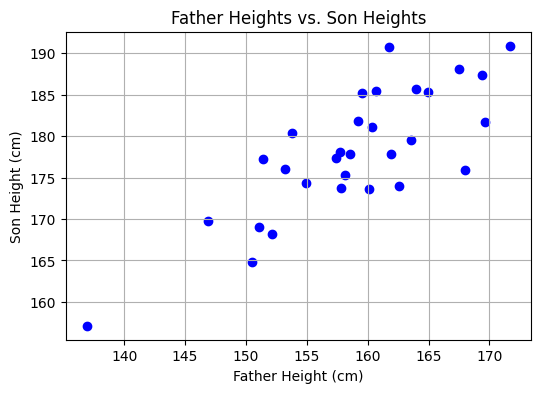

In [358]:
data = {'Father Height': Father_Height, 'Son Height': Son_Height}

# Create the DataFrame
df = pd.DataFrame(data)
print(df.corr())

# Plot father heights vs. son heights

plt.figure(figsize=(6,4))
plt.scatter(Father_Height,Son_Height, color='b')
plt.title("Father Heights vs. Son Heights")
plt.xlabel("Father Height (cm)")
plt.ylabel("Son Height (cm)")
plt.grid(True)
plt.show()

- Positive correlation means if one variable increases, then the other increases as well.
- Now, if the father is tall then it's highly likely the son is also tall. i.e. there's some positive correlation between them.
- Negative correlation means if one variable increases, the other decreases.
- In terms of father-son height, it means if the father is tall then the son would be short; which is quite rare or outlier.
- We already know that correlation coef. ranges from -1 to 1. Hence it can't be greater than 1.

A researcher is analyzing the relationship between the number of hours students spend studying and their exam scores. He collects data from 10 students:

study_hours = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])  
exam_scores = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100, 105])

Calculate the Pearson correlation coefficient between these variables.

In [359]:
study_hours = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])
exam_scores = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100, 105])

corr, pval = pearsonr(study_hours, exam_scores)

print("Pearson Correlation Coefficient: ", corr)

Pearson Correlation Coefficient:  1.0


In [360]:
# Calculate mean of these variables
mean_study_hours = np.mean(study_hours)
mean_exam_scores = np.mean(exam_scores)

# Calculate the numerator and denominators for Pearson correlation
numerator = np.sum((study_hours - mean_study_hours) * (exam_scores - mean_exam_scores))
denominator_x = np.sqrt(np.sum((study_hours - mean_study_hours)**2))
denominator_y = np.sqrt(np.sum((exam_scores - mean_exam_scores)**2))

# Calculate Pearson correlation coefficient
correlation_coefficient = numerator / (denominator_x * denominator_y)

correlation_coefficient

1.0000000000000002

<Axes: >

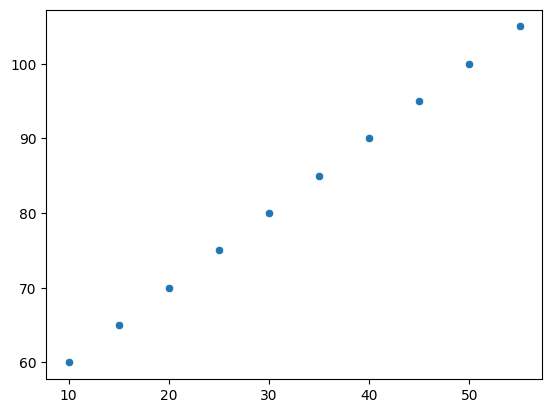

In [361]:
study_hours = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])
exam_scores = np.array([60, 65, 70, 75, 80, 85, 90, 95, 100, 105])

sns.scatterplot(x=study_hours, y=exam_scores)

- First we need to verify if we can implement Pearson correlation on this, by plotting a scatter plot, and observing if their relationship seems linear.

Compute the pearson and spearman correlation between two variables a and b .


In [362]:
a = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
b = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

corr, pval = pearsonr(a, b)
print("Pearson Correlation Coefficient: ", corr)

corr, pval = spearmanr(a, b)
print("Spearmanr Correlation Coefficient: ", corr)

Pearson Correlation Coefficient:  0.81642051634484
Spearmanr Correlation Coefficient:  0.8181818181818182


A biologist is studying the relationship between the height of plants and the amount of sunlight they receive.

The biologist collects data from 8 different plants, measuring their heights (in centimeters) and ranking them based on the amount of sunlight they receive.

plant_heights = np.array([15, 20, 25, 18, 22, 30, 28, 35])

sunlight_rankings = np.array([4, 7, 3, 6, 5, 8, 2, 1])

Calculate the Spearman correlation between these variables.

In [363]:
plant_heights = np.array([15, 20, 25, 18, 22, 30, 28, 35])
sunlight_rankings = np.array([4, 7, 3, 6, 5, 8, 2, 1])

corr, pval = spearmanr(plant_heights, sunlight_rankings)
print("Spearmanr Correlation Coefficient: ", corr)

Spearmanr Correlation Coefficient:  -0.3333333333333334


Consider the below plot for two continuous variables:

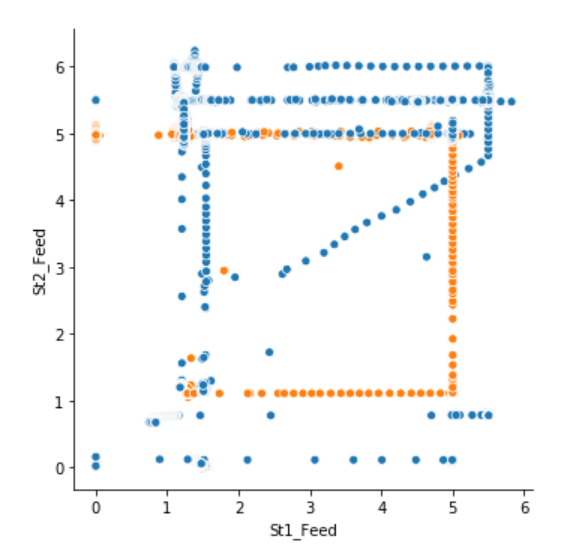


Answer :
- There is no relationship or trend between the two variables.
- In other words, as one variable changes, there is no consistent or predictable change in the other variable.

Based on Spearman's rank correlation, order the below plots from highest to lowest correlation.

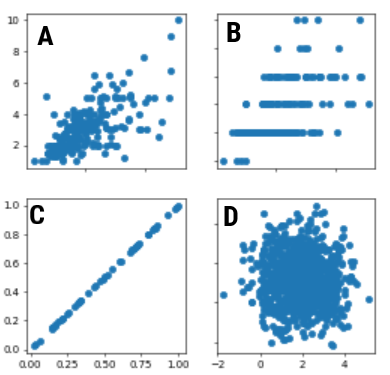

Answer :

According to Spearman’s rank correlation :

1) When there are two variables X and Y, if X and Y both increase or decrease simultaneously, then they are strongly positively correlated. The stronger the relationship between them, the more correlated they are.

2) If when X increases and Y decreases, then those two variables are weakly negatively correlated.

3) When any of the two variables is not changing (i.e., constant) then there is no relationship between the variables.

We can observe that:

- A exhibits a pattern where data points are scattered around a straight line, indicating a positive correlation.
- Though a straight line can also be used to show the trend of positive correlation in B, the data points would be farther away from the line on an average, when compared to A.
- C consists of a straight line, indicating a correlation approximately equal to 1
- In D, we cannot see any increasing or decreasing pattern. We can conclude that Spearman correlation is approximately equal to 0.


Based on this the correct order will be C, A, B, D

Based on the following plots, arrange them in descending order with respect to their correlation values.

1)

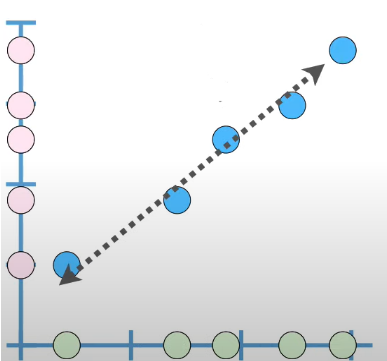

2)

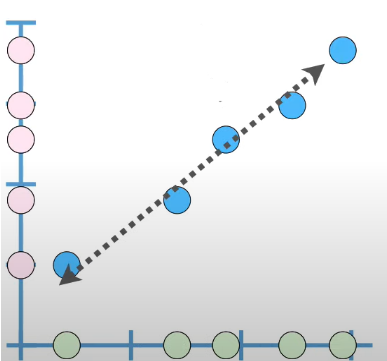

3)

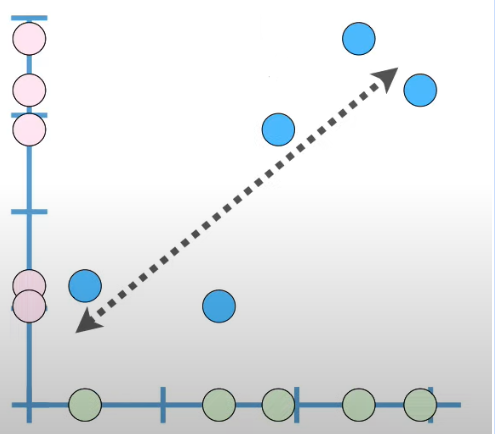

4)

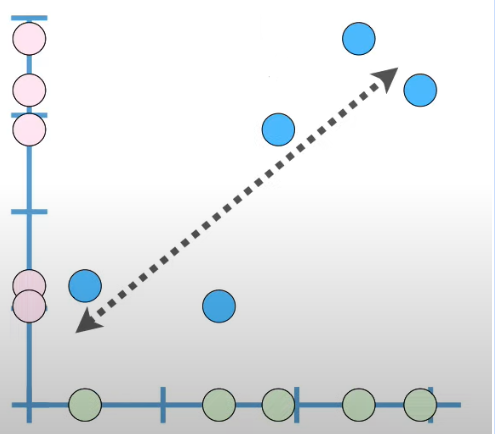

Answer:

- Data points with relatively weak relationship have small correlation values. - Relationship can be deduced by observing how close the data points are to the line of best-fit.
- Here, Option (i) have data points most far from the line, followed by option (iii), then (ii) and then lastly Option (iv).


Hence correlation will be in order iv > ii > iii > i.

## **Feature Engineering**

Which type of graphical techniques can be applied to analyze Continuous and Categorical features?

In [364]:
# Correct Answers:

# Box plot for continuous variable.
# Bar plot for categorical variable.
# Histogram for continuous variable.
# Q-Q plot specifically for outliers in Continuous variable.

# Explanation:

# Continuous variables can be analyzed using Histogram, KDE, and Boxplot.
# Categorical Variable can be analyzed using Bar Plot, Pie Chart, and Frequency Table
# A Q-Q plot is used for testing whether a dataset follows a distribution, but it is also used to determine outliers.

Suppose you are working on two distributions:

A which is positively skewed, and B which is negatively skewed.
Which of the statements are correct for the relationship between mean, median, and mode for distributions A and B?

A: Mean > Median > Mode

B: Mean < Median < Mode

A: Mean < Median < Mode

B: Mean > Median > Mode


In [365]:
# A: Mean > Median > Mode

# B: Mean < Median < Mode

While doing EDA on a car's price prediction dataset, we plotted the pair plots for the features ['maintenance', 'insurance', 'number_of_gears'] and got the following result:

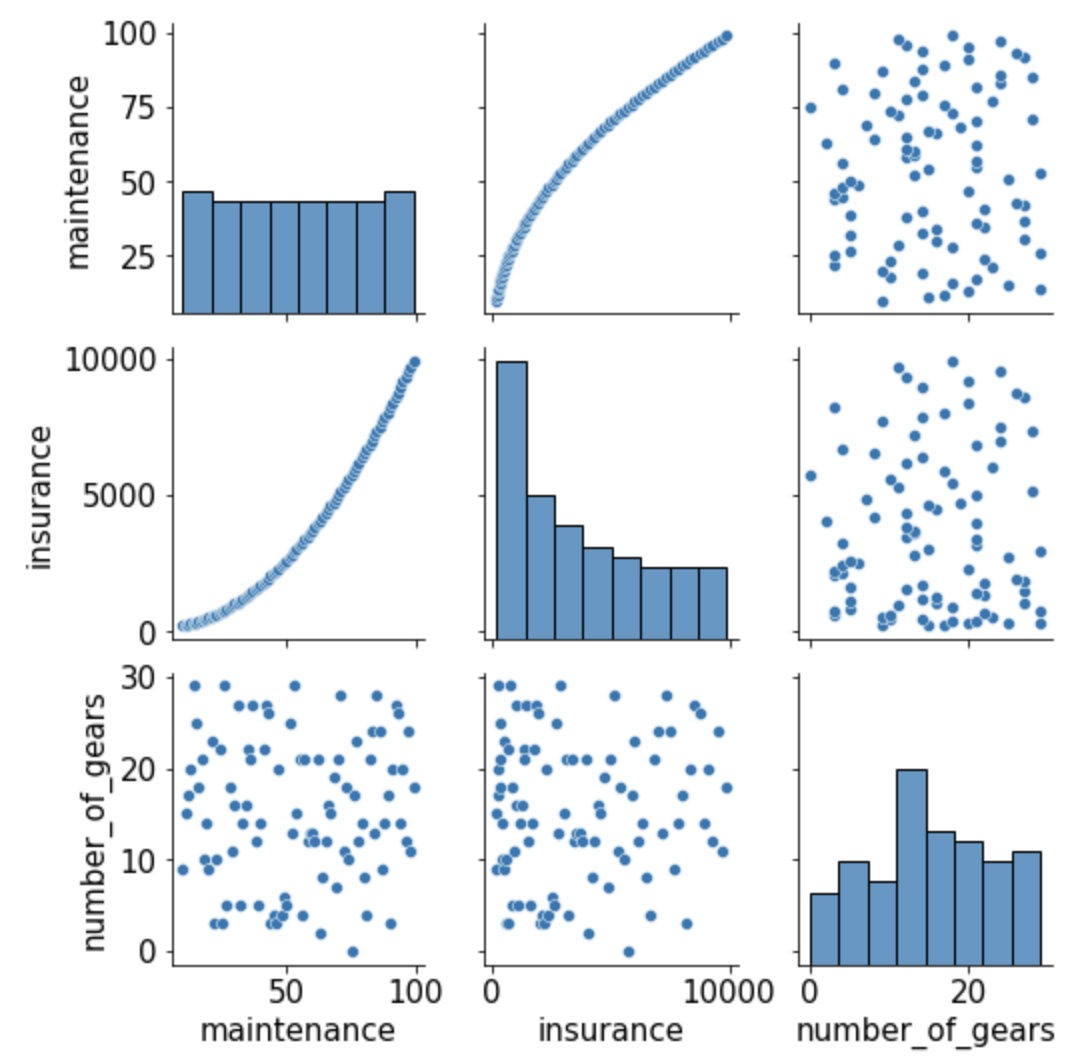


Which of the options is correct with respect to the pair plots given the info that maintenance is helpful in the prediction of a car’s price?

1. A new feature which is the sum of insurance and maintenance will also be helpful in the price prediction of cars

2. A new feature which is the sum of insurance and number_of_gears will also be helpful in the price prediction of cars

3. A new feature which is the sum of maintenance and number_of_gears will also be helpful in the price prediction of cars

4. A new feature which is the sum of insurance and maintenance won’t be helpful in the price prediction of cars.

In [366]:
# A new feature which is the sum of insurance and maintenance will also be helpful in the price prediction of cars.

# Explanation:

# It is visible from the pair plots that maintenance and insurance are highly positively correlated and it’s also informed that maintenance is helpful while predicting a car’s price.

# Therefore it can easily be interpreted that when a new feature is actually the sum of insurance and maintenance
# it will still be helpful with the prediction as being helpful would mean that there should be some correlation between feature and price.

The following list contains data about the age of visitors, in a mall.

data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]

Based on the given data, decide the distribution of data.

In [367]:
# For a negatively skewed distribution, mean<median<mode
# For distribution with no skewness(Normal), mean=median=mode
# For a positively skewed distribution, mean>median>mode

data=np.array([38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38])
mean = data.mean()
median = np.median(data)

#there is no direct method to determine the mode.
vals,counts = np.unique(data, return_counts=True)
index = np.argmax(counts)
mode = vals[index]

print("mean:",mean,",median:",median,",mode:",mode)

mean: 26.545454545454547 ,median: 24.5 ,mode: 21


In [368]:
# we can clearly observe that mean > median > mode, which is a case of right-skewed distribution.

<ipython-input-369-db7ace183678>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data)


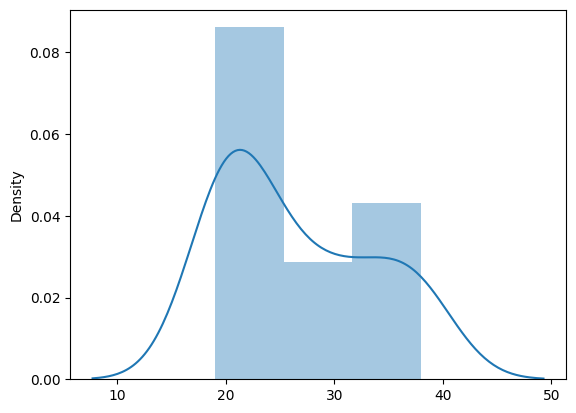

In [369]:
sns.distplot(x=data)
plt.show()

Data distributions can be named based on the kurtosis value. Specifically, for given kurtosis k :

If k = 3, it is called a Mesokurtic distribution and has kurtosis statistics similar to a normal distribution.

For k > 3, it is called a Leptokurtic distribution (has a profound number of outliers)

And for k < 3, it is called a Platykurtic distribution (shows lack of outliers).

Based on this information, given a data sample [4, 6, 2, 18, 7, 2], what would be this kind of distribution called?

<Axes: ylabel='Count'>

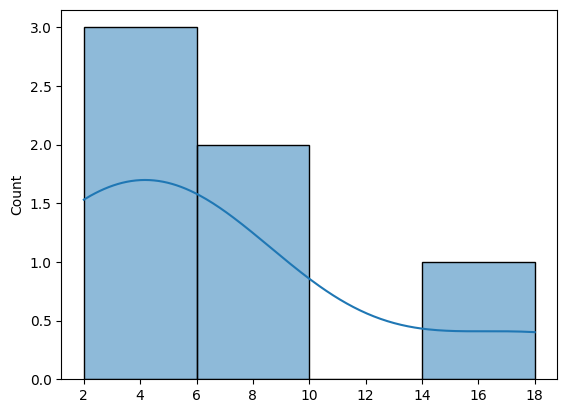

In [370]:
data = pd.Series([4, 6, 2, 18, 7, 2])
sns.histplot(data, kde=True)

In [371]:
# This plot is not enough to help us determine which distribution is followed, as the data size is very small.

In [372]:
data.kurt()

3.7162188375322973

In [373]:
# Since this is greater than 3, we conclude that the data follows Leptokurtic distribution.

In [374]:
# Kurtosis gives us the measure of tailedness and outliers in the distribution of the data. It does not give us the measure of the peak.
# The Q-Q plot between the log-normal distribution and normal distribution won’t be a straight line.
# For getting a straight line we will first have to take the log of each value in the log-normal distribution and then
# the Q-Q plot of these logarithmically transformed values from the log-normal distribution and normal distribution will be a straight line.
# For a data distribution like the one in the picture shown below also we can get a good Spearman correlation score but with that, we cannot assume that the relationship between the data is linear.

We believe that the loan.csv data shows that graduate unmarried men are in a different income group than both married and unmarried graduate women.

To prove this, would a t-test be more appropriate or a chi-square test?

Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

Note: Assume a confidence level of 95% and round off the p-value to 2 decimal places.

In [375]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299
To: /content/loan.csv?1666170299
100% 38.0k/38.0k [00:00<00:00, 32.1MB/s]


In [376]:
data = pd.read_csv('loan.csv?1666170299')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [377]:
# We will perform a t-test since the incomes are a continuous variable.

# Nulll hypothesis (H0) : The incomes of both groups are similar.
# Alternate hypothesis (Ha) : The incomes of both groups are different.

# Load the Income data for graduate unmarried men
unmarried_graduate_men = data[(data["Gender"] == "Male") & (data["Married"] == "No") & (data["Education"] == "Graduate")]["ApplicantIncome"]
unmarried_graduate_men.dropna(inplace=True)
print("Number of unmarried graduate men datapoints: ", len(unmarried_graduate_men))

# Load the data for graduate women
graduate_women = data[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]["ApplicantIncome"]
graduate_women.dropna(inplace=True)
print("Number of graduate women datapoints: ", len(graduate_women))

# Perform a t-test since the incomes are a continuous variable.
p_value = ttest_ind(unmarried_graduate_men, graduate_women)[1]
print("p_value :" ,round(p_value,2))

if p_value > 0.05:
 print('Since p_value > 0.05 we fail to reject the null hypothesis.')

else:
 print('Since p_value < 0.05 we reject the null hypothesis.')

Number of unmarried graduate men datapoints:  99
Number of graduate women datapoints:  92
p_value : 0.08
Since p_value > 0.05 we fail to reject the null hypothesis.


We wish to create a new feature called 'NewFeature' using a linear combination of the features ApplicantIncome, LoanAmount and Credit_History, with weights 1, 3 and 7000,

i.e., data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"]).

Since 'NewFeature' is a numerical feature, convert it to a categorical feature by checking whether 'NewFeature' is greater than 0.25 times the mean of 'NewFeature'. Call this feature 'Separator'.

Perform a chi-square test on the contingency table formed by the features 'Loan_Status' and 'Separator' and report the p-value. Also report your interpretation.

Note: Drop all the rows having 'na' values before performing any operation on the data and assume the significance level to be 5%. Also, round off the p-value to four decimal places.

In [378]:
# H0: The features Separator and Loan_Status are independent.
# Ha: The features Separator and Loan_Status are dependent on each other.


# Drop rows with 'na' values
data.dropna(inplace=True)

# Create the 'NewFeature' and 'Separator'
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data['Separator'] = data['NewFeature'] > (0.25 * data['NewFeature'].mean())

# Create a contingency table for 'Loan_Status' and 'Separator'
contingency_table = pd.crosstab(data['Loan_Status'], data['Separator'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Round off the p-value to four decimal places
rounded_p_value = round(p_val, 4)

# Interpretation based on the p-value
interpretation = None

if rounded_p_value <= 0.0001:
    interpretation = "p-value 0.0001, the two features 'Separator' and 'Loan_Status' are dependent."
elif rounded_p_value <= 0.0003:
    interpretation = "p-value 0.0003, the two features 'Separator' and 'NewFeature' are dependent."
elif rounded_p_value <= 0.0003:
    interpretation = "p-value 0.0003, the two features 'NewFeature' and 'Loan_Status' are independent."
else:
    interpretation = "p-value 0.0001, the two features 'Separator' and 'Loan_Status' are independent."

print("Chi-square test p-value:", rounded_p_value)
print("Interpretation:", interpretation)

Chi-square test p-value: 0.0001
Interpretation: p-value 0.0001, the two features 'Separator' and 'Loan_Status' are dependent.


In [379]:
# H0: The features Separator and Loan_Status are independent.
# Ha: The features Separator and Loan_Status are dependent on each other.

# Add a column indicating that the entry contains graduate and married men
data.dropna(inplace=True)
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data['Separator'] = data['NewFeature'] > (data['NewFeature'].mean()*0.25)

# Perform a chi-square test since the incomes are a continuous variable.
contingency = pd.crosstab(data['Separator'], data['Loan_Status'])
print(contingency)

# p-value calculation
p_value = chi2_contingency(contingency)[1]
print('p-value:',round(p_value,4))

if(p_value < 0.05):
  print("Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.")
else:
  print("Since p-value > 0.05, the two features 'Separator' and 'Loan_Status' are independent.")

Loan_Status    N    Y
Separator            
False         11    2
True         137  330
p-value: 0.0001
Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.


In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants who were rejected for a loan, applicants with a credit history of 1 are more likely to be female.

Use a chi-square test to verify this claim (Ensure that you drop all nan rows), and report your interpretation.

Note: Use a significance level of 5%.

In [380]:
# Null hypothesis (H0): the features are independent.
# Alternate hypothesis (Ha) : the features are dependent.

# data of all the rejected applicants
chn = data[(data["Loan_Status"] == "N")]

#dropping na values
chn = chn.dropna()

#contingency table
contingency = pd.crosstab(chn['Gender'], chn['Credit_History'])
print('\n',contingency,'\n')

#p-value
print('p-value:', round(chi2_contingency(contingency)[1],3))

if p_value > 0.05:
 print('Since p_value > 0.05, we fail to reject the null hypothesis.')
else:
 print('Since p_value < 0.05, we reject the null hypothesis.')


 Credit_History  0.0  1.0
Gender                  
Female           13   19
Male             50   66 

p-value: 0.961
Since p_value < 0.05, we reject the null hypothesis.


The below data represents the carbon dioxide emission from vehicles in grams/per km. There are a few missing values present in the data.

What will be the imputing strategy that we can use?

data=[50,196,221,136,255,NaN,230,252,267,212,NaN,359,328,200,500,624,NaN,236,289,300,366]

import numpy as np
from sklearn.impute import SimpleImputer
data=np.array(data)
imputer = SimpleImputer(strategy = “________”)
data1= imputer.fit_transform(data.reshape(1,-1))

Choose the correct answer:

* mean
* median
* most_frequent
* constant


In [381]:
from sklearn.impute import SimpleImputer
data=[50,196,221,136,255,'NaN',230,252,267,212,'NaN',359,328,200,500,624,'NaN',236,289,300,366]
data=np.array(data)

imputer = SimpleImputer(strategy = "median")
data1= imputer.fit_transform(data.reshape(1,-1))
data1

array([[ 50., 196., 221., 136., 255., 230., 252., 267., 212., 359., 328.,
        200., 500., 624., 236., 289., 300., 366.]])

You are cleaning up a DataFrame that has almost 5000 observations and you notice that one of the categorical columns contains 1512 missing values.

What strategy should you apply to deal with these missing values?

Choose the correct answer from below:



* Impute the missing values with the most_frequent value.
* Drop all the rows that contain missing values.
* Drop the column entirely that contains missing values.
* Replace all values with randomly selected values.



In [382]:
# Correct option: Impute the missing values with the most_frequent value.


# Explanation:

# Since the column is categorical we can replace it with the most frequent value.
# We cannot drop all the rows which will result in loss of information and we might lose some important data.
# We cannot replace all the values with randomly selected values either. There is no sense of doing this.
# We cannot drop the entire column that contains missing values as it may result in a huge loss of important data.

What does the following code snippet do?

from sklearn.impute

import SimpleImputer

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(data)

imputed_train_df = imp_mean.transform(data)

Choose the correct answer from below:

* Calculates the mean of the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the median of the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the most frequent value among the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the mean of the non-missing values in the whole dataset and then replacing the missing values


In [383]:
# Correct option: Calculates the mean of the non-missing values in a column and then replacing the missing values within each column separately

# Explanation:

# SimpleImputer() replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column or using a constant value.

# when strategy=’mean’ is passed inside, it calculates the mean of the non-missing values in a column and then replaces the missing values within each column separately

The below data represents the Carbon Dioxide emissions from a vehicle.

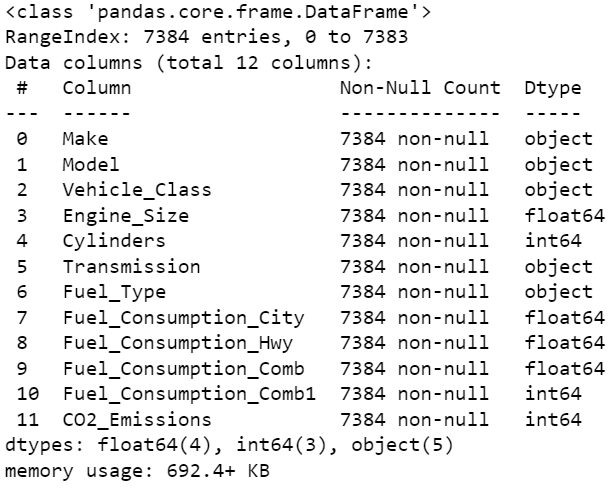

There are 11 features and 1 target column. In the independent variables “Make” represents 42 unique car companies.

Which feature engineering technique can be applied to this column?

Choose the correct answer from below:

* One-Hot Encoding
* Feature Binning
* Feature Scaling
* Feature Engineering.


In [384]:
# # Correct option: Feature Binning

# # Explanation:

# # If we do one hot encoding it will increase the cardinality issue and most of the data will be sparse data.
# # We cannot apply feature scaling or feature engineering / transformation as it is not a numeric feature.
# # We can do feature binning by dividing the 42 unique car companies into 4 categories, for example, Luxury, Sports, Premium, and General cars.

# print('Initial column:\n', data['Make'].unique())

# data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI' 'JAGUAR','SRT'], 'Sports')

# data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
#                                                'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'], 'Premium')

# data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE', 'GENESIS'], 'Luxury')

# data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA', 'VOLKSWAGEN'], 'General')

# print('Final column:\n', data['Make_Type'].unique())


# Output:

# Initial column:
# array([‘ACURA’, ‘ALFA ROMEO’, ‘ASTON MARTIN’, ‘AUDI’, ‘BENTLEY’, ‘BMW’, ‘BUICK’, ‘CADILLAC’, ‘CHEVROLET’,
#        ‘CHRYSLER’, ‘DODGE’, ‘FIAT’,’FORD’, ‘GMC’, ‘HONDA’, ‘HYUNDAI’, ‘INFINITI’, ‘JAGUAR’, ‘JEEP’,’KIA’,
#        ‘LAMBORGHINI’, ‘LAND ROVER’, ‘LEXUS’, ‘LINCOLN’, ‘MASERATI’,’MAZDA’, ‘MERCEDES-BENZ’, ‘MINI’, ‘MITSUBISHI’,
#        ‘NISSAN’,’PORSCHE’, ‘RAM’, ‘ROLLS-ROYCE’, ‘SCION’, ‘SMART’, ‘SRT’, ‘SUBARU’,’TOYOTA’, ‘VOLKSWAGEN’, ‘VOLVO’, ‘GENESIS’, ‘BUGATTI’],dtype=object) - These are 42 unique types.

# Final column:
# array([‘Sports’, ‘Premium’, ‘Luxury’, ‘General’],dtype=object) - These are 4 unique types.

Data on the number of text messages sent one weekend by girls and boys in school is summarized as follows:

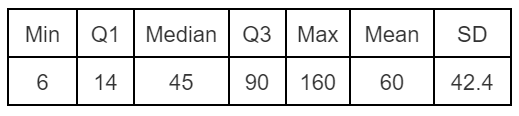

A Statistics student checking the calculations finds that the message counts for all the students were underreported by 5.

If the numbers are corrected, what are the corrected IQR and standard deviation?

Choose the correct answer from below:

* IQR = 71 and standard deviation = 42.4
* IQR = 71 and standard deviation = 46.2
* IQR = 76 and standard deviation = 42.4
* IQR = 76 and standard deviation = 46.2

In [385]:
# Correct option: IQR = 76 and standard deviation = 42.4

# Explanation:

# Thus, IQR = Q3 - Q1 = 90-14 =76
# and standard deviation = 42.4

For a certain array [0, 1, 2, 3, 4, 5, 10], we decided to plot a boxplot as below:

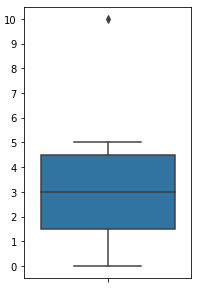

According to the above plot, calculate the upper limit, median, and lower limit, such that, a data point would be considered as an outlier if it is out of those limits.

Choose the correct answer from below:

* 9, 3, -3
* 11,3, -5
* 11, 3, 4
* 8.5, 3.5, -5


In [386]:
data = [0, 1, 2, 3, 4, 5, 10]

Q3 = np.percentile(data, 75)
print("Q3 = ",Q3)
Q1 = np.percentile(data, 25)
print("Q1 = ",Q1)
IQR = Q3 - Q1
print("IQR = ",IQR)
print()

UPPER = Q3 + 1.5*IQR
print("UPPER = ",UPPER)
MEDIAN = np.percentile(data, 50)
print("MEDIAN = ",MEDIAN)
LOWER = Q1 - 1.5*IQR
print("LOWER = ",LOWER)

Q3 =  4.5
Q1 =  1.5
IQR =  3.0

UPPER =  9.0
MEDIAN =  3.0
LOWER =  -3.0


Read below statements regarding two data transformation techniques Standardization and Normalization.

A : Normalization forces all features to come down to same range

B : Standardization computes the z-score of all values which makes the feature mean = 0

Mark statements A and B as True or False.

Choose the correct answer from below:

* A : True, B : False
* A : True, B : True
* A :False, B : True
* A :False, B : False


In [387]:
# Correct Option: A : True, B : True

# Explanation:

# Statement A : True.
# Normalization is a technique that scales the individual features to have the same range.
# It brings the values of different features into a comparable range, often between 0 and 1.

# Statement B : True
# Standardization (or z-score normalization) scales the features in such a way that they have a mean of 0 and a standard deviation of 1.

Imagine a dataset with two features: 'Age' and 'Salary'.

* 'Age' has a mean of 30 and a standard deviation of 5, while
* 'Salary' has a mean of 80,000 and a standard deviation of 20,000.

You decide to apply Standard Scaling to both features.

After applying Standard Scaling, what can be said about the transformed 'Age' and 'Salary' features?

Choose the correct answer from below:

* Both features will have a mean of 0 and a standard deviation of 1.
* 'Age' will have a mean of 0 and a standard deviation of 1, while 'Salary' will have a mean of 0 and a standard deviation of 20,000.
* There will be no change in the mean and standard deviation for both features.
* Both features will be standardized but will not necessarily have values between 0 and 1.


In [388]:
# Correct Option: Both features will have a mean of 0 and a standard deviation of 1.

# Explanation:
# When you apply Standard Scaling (Standardization) using the Standard Scaler, it transforms the data in such a way that the resulting features have a mean of 0 and a standard deviation of 1.
# This is achieved by subtracting the mean of the feature and dividing by its standard deviation for each data point.

# In this scenario:

# ‘Age’ will be transformed to have a mean of 0 and a standard deviation of 1.
# ‘Salary’ will be transformed to have a mean of 0 and a standard deviation of 1.
# The process of standardization does not change the unit of measurement; it scales the features to be centered around 0 with a standard deviation of 1, making it easier to compare and analyze them.

Consider a dataset with two features: 'Weight' and 'Height’.

'Weight' values range from 50 to 90, and
'Height' values range from 160 to 190.

Data:

Weight = [70, 80, 60, 90, 50],  
Height = [170, 180, 160, 190, 165]

Which scaler should we choose to preprocess these features for our machine-learning model?

Choose the correct answer from below:

* A. Min-Max Scaler for 'Weight' and Standard Scaler for 'Height'
* B. Standard Scaler for 'Weight' and Min-Max Scaler for 'Height'
* C. Min-Max Scaler for both 'Weight' and 'Height'
* D. Standard Scaler for both 'Weight' and 'Height'



In [389]:
# Correct Option: D. Standard Scaler for both ‘Weight’ and ‘Height’

# Explanation:

# Standard Scaler standardizes data by subtracting the mean and dividing by the standard deviation. This is generally preferred for machine learning models as it:
# Makes all features have zero mean and unit variance, which can improve model performance.
# Ensures all features contribute equally to the model, regardless of their original units or scales.

# Min-Max Scaler scales the data to a specific range, typically between 0 and 1. This may be useful in certain cases, but it can be problematic for machine learning models because:
# It removes information about the spread of the data (variance), which can be important for certain models.
# It can amplify the effect of outliers.

# In this particular case, both ‘Weight’ and ‘Height’ are continuous features with a well-defined range.
# Therefore, using Standard Scaler ensures that both features are standardized and contribute equally to the machine learning model.

# A and B are incorrect because:
# Applying different scaling methods to different features can lead to inconsistencies in the data and potentially harm the performance of the machine learning model.
# In this case, there is no specific reason to choose Min-Max Scaler over Standard Scaler for either feature.

# C is incorrect because:
# While Min-Max Scaler can be useful in certain situations, it is not the best approach for this specific case as explained above.
# Standard Scaler is a more general-purpose scaler and is preferred for machine-learning models.

A dataset contains exam scores for students, ranging from 40 to 100. However, there are a few outliers with scores exceeding 120.

Which method is more suitable for identifying outliers in this scenario?

You have already attempted this problem, to see your original answer, Click Here . However you can re attempt this problem but your score will not be revised

* Interquartile Range (IQR)
* Z-Score
* Both methods are equally suitable.
* Neither method is suitable for outlier detection.


In [390]:
# Correct Option: Interquartile Range (IQR)

# Explanation:

# IQR method:
# This method identifies outliers based on the quartiles of the data.
# It is more resistant to outliers than the mean-based methods like Z-score, making it better suited for skewed data like exam scores where a few high scores can significantly impact the mean.

# Z-score method:
# This method identifies outliers based on their standard deviation from the mean.
# However, it can be influenced by outliers itself, leading to inaccurate outlier detection when the data is skewed.
# In this scenario, the presence of a few high scores can inflate the standard deviation, potentially masking other outliers or misidentifying valid data points as outliers.

What does the following code snippet do?

from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(strategy='most_frequent')

imp_mean.fit(data)

imputed_train_df = imp_mean.transform(data)

Choose the correct answer:

* Calculates the mean of the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the median of the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the most frequent value among the non-missing values in a column and then replacing the missing values within each column separately
* Calculates the most frequent value among the non-missing values in the whole dataset and then replace the missing values


In [391]:
# Correct option: Calculates the most frequent value among the non-missing values in a column and then replacing the missing values within each column separately.

# Explanation:

# SimpleImputer() replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column or using a constant value.
# when strategy= 'most_frequent' is passed inside, it calculates the mode of the non-missing values in a column and then replaces the missing values within each column separately.

Which of the following statements are true about handling categorical values?


a) One-hot encoding is the most effective approach for handling all categorical data.

b) One-hot encoding increases the dimensionality of the data.

c) Target encoding uses the target variable to estimate the value of each category in a categorical variable.

d) Label encoding can be useful for features with a large number of categories.

e) No encoding is also sometimes the best option for handling categorical variables.

f) Label encoding assigns arbitrary numerical values to categories in a categorical variable.

Choose the correct answer from below:

* b, c, f
* a, c, e, d
* a, e, d
* a, b, e, f
* All statements are correct


In [ ]:
# Correct Option: b, c, f

# Explanation:

# The true statements about handling categorical values are:

# b) One-hot encoding increases the dimensionality of the data. This is because every category in the original variable is represented by a new binary feature in the one-hot encoded data.

# c) Target encoding uses the target variable to estimate the value of each category in a categorical variable. This is done by calculating the average target value for each category and
#    using that value to represent the category.

# f) Label encoding assigns arbitrary numerical values to categories in a categorical variable. This is done by assigning a unique integer to each category,
#    but the order of the integers does not necessarily reflect the order of the categories.


# The incorrect statements are:

# a) One-hot encoding is the most effective approach for handling all categorical data.
# This is not true, as other encoding techniques, such as label encoding and target encoding, may be more suitable for certain types of categorical data.

# d) Label encoding can be useful for features with a large number of categories.
# This is not true because when there are many categories, label encoding can create a large number of features, which can increase the dimensionality of the data and make it difficult for the model to learn.

# e) No encoding is also sometimes the best option for handling categorical variables:
# Not true.
# Encoding is generally necessary for machine learning models to interpret categorical data correctly.